# Probability and land-use

_draft: need to add definition and method for logistic regression_

The introduction of a threshhold value for beach-litter density by the EU and the reasons for the application of that threshhold mark a change in the importance and use of beach litter data. Prior to the establishment of a threshold the primary use of beach-litter data was to _educate_ the public and in some instances define a link with mortality and mobidity of marine species. At present beach-litter survey results are also considered on the numerical distance from a stated goal. That goal is defined in __pieces of trash for every 100 m__. The goal is based on the principal of precaution, that means we are unsure of the long term consequences of exposure to plastics and it would be best to minimize exposure if possible.[EU Threshold Value for Macro Litter on Coastlines](https://mcc.jrc.ec.europa.eu/main/dev.py?N=41&O=454)

With the announcement of a threshhold value __there was no subsequent recomendation for changing the methods of sampling__. Consequently, this environmental assessment relies on the recorded observations of volunteers following a standard protocol. According to the journal [Nature](https://www.nature.com/articles/s41893-019-0390-3), programs that include the involvement of citizens in scientific research and/or knowledge production, can complement and ultimately improve the Sustainale Development Goals (SDG) reporting process. Beach litter applies specifically to SDG 14, __the target of achieving substantial reductions in marine pollution__. 

## Motivation

Each encounter is local by definition (the location can be defined by a GPS point) and the time/date is unique for each survey for each person, or group of people doing a survey. Often the people that conduct the survey are beach-users themselves and local to the region. The encounter is the result of the desire of the person or group to remove these objects from the environment. __That is, the motivation to remove the object was present before the desire to record its existence__ (need reference). The value of the data is a byproduct of a fundamentally sound way to mitigate the problem: _pick it up and put it a bin_. The financial costs of these actions are only partially supported publicly, the balance coming from the participants themselves. 

This document hopes to return some of the value of the data back to the participants by defining a method to interpret beach litter survey results that can be used for local planning purposes. In other words the method of inference should match the scale of the intervention and in the case of beach-litter surveys the scale is always local.

### Propositions

1. Data from beach litter surveys can be used to estimate survey results at a local level.
2. The topographical attributes of the survey location are related to survey results
   1. within a defined radius of each location
   2. the combined attributes for a region define the survey results

__assumptions__

1. reasonable people are collecting the data
2. protocols are followed
3. similar environmental conditions produce similar results
4. there is high varaibility in survey results
5. results represent the minimum number, the maximum is unknown
6. samples are independent
7. results are local

__Results are local:__ This means that _events that produce large amounts of trash on the shoreline are possible at all moments at any location_. This includes:

1. thunderstorms, high-winds, local flood events
2. accidental spills, illegal dumping
3. or any event that includes consumption as a revenue source. 

It is also possible that a beach litter survey can yield extremely low results. __There is no immediate significance attached to the magnitude of a survey result__. Extreme values are expected.

## Methods of inference

The method of data collection suggests a method of interpretation and analysis that is appropriate to real systems, can be tested empirically and allows reasonbale people to arrive at reasonable conclusions. The methods used in this document are all based on the calculus of probabilities and the application of prior knowledge to determine the probability of an event. Fortunately we don't need to invent a method, there are several appropriate techniques for arriving at a consensus estimate of a requested metric based on experiment results and prior knowledge. (Maxwell, La Place, Bayes, Jaynes, Gelman, Savage, Davidson-Pilon, Downey, Jefferies)

The basic method is __testing the probability that a given limit will be exceeded under the specified conditions__. We are using the survey results and the land-use attributes to define the limit and conditions. 

### Binomial distribution

In the previous sections we were concerned with defining the relationship between the land use profile and the density of litter identified. This definition we limited to defining wether or not the quantity or magnitude of a type of land use was montotonic with litter density and if so what was the direction ? positive or negative ?. In this section, the question is more detailed and more specific:

1. __How likely is a survey result to exceed a threshold here and now ?__
   1. __Here__ can be any location with a land-use profile that would also make an appropriate survey location
   1. __Now__ siginifies our expectations at the next survey.
   
This metric was introduced in the federal report as the fail-rate: _the number of times that at least one of an object was found at a survey_, all landuse values were held constant. This allowed us to select ojects of interest using frequency as a metric as well as quantity or density. Thus, it is easy to identify objects that are found frequently but not in large quantities. In this form the fail rate is also the most likely estimate (MLE) of the parameter _p_ for the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) that describes the probability of finding at least one of a requested object at a survey. How the fail rate can be used to determine a range of probable values for any object at any location was defined in, [finding one object](https://hammerdirt-analyst.github.io/finding-one-object/titlepage.html), the example was feminine hygiene products. 

### Odds and log odds

The odds of success are defined as the number of times that a test had a positive result v/s the number of times that the results were negative, or _k/(n-k)_. The probability of success can also be given as an _odds ratio:_ the probability of success divided by the probability of failure or $\frac{p}{1-p}$, where $p$ = the probability of success. Therefore, the log odds are _ln(_$\frac{p}{1-p}$_)_ or [Logit](https://en.wikipedia.org/wiki/Logit).

The log odds are used in [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), a commonly used method to model binary variables with multiple independent variables. In the case of beach litter data we are modeling the binary variable: "Did the survey result exceed the threshold?. Commonly used in machine learning models, logistic regression is often part of classification or labeling processes.

## Data

### Variables

1. independent variables: m² of each land use category, m of roads, m of rivers that intersect, m to river intersection point
2. outcome variable: binary, wether or not the threshold was exceeded at a survey
3. success: the threshold was exceeded = 1 else 0

__We assume that the land-use adjacent to the survey location and magnitudes of local river inputs are predictor varaibles for the amount of trash found on the shore line__.

### Survey data

The samples from the period 2020-2021 (IQAASL) for the following lakes are considered:

* Zurichsee
* Bielersee
* Neuenburgersee
* Walensee
* Vierwaldstattersee
* Brienzersee
* Thunersee
* Lac Léman
* Lago Maggiore
* Lago di Lugano
* Zugersee

In [1]:
%load_ext watermark
# sys, file and nav packages:
import datetime as dt
import json
import functools
import time
from os import listdir
from os.path import isfile, join
import typing

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats

from scipy.stats import beta
from scipy.stats import binom
from scipy import optimize
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import seaborn as sns

import IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display
from myst_nb import glue

import resources.landuse_config as luse
import resources.empiricaldist as emp

import time


def count_nk_bin(data, locations, agg={"k":"sum","n":"sum"}):
    
    return data.loc[locations].agg(agg)

def retrieve_locations_by_bin(data, value="use", columns=["use", "binned"], use="Fels"):
    d = data[data[value] == use]
    d = d.groupby(columns, as_index=False, dropna=False).location.unique()
    return d.dropna()

def collect_odds_frequency(data):
    data["odds"] = data["k"]/(data["n"] - data["k"])
    data["frequency"] = data["k"]/data["n"]
    
    return data

def collect_bin_data(tested, xtest, value="use"):
    use = xtest[value].unique()
    binned = xtest.binned.unique()
    locations = xtest.location.values
    
    bins = []
    
    for i, anarray in enumerate(locations):
        
        a_count = count_nk_bin(tested, anarray)
        a_count[value] = use[0]
        a_count["binned"] = binned[i]
        bins.append(a_count)
    return bins

def n_and_k_for_a_set_of_landuse_data(tested, binned_land_use_data, value="use", value_vars=["use", "binned"]):
    
    binned = []
    for use in binned_land_use_data[value].unique():
        locations_by_bin = retrieve_locations_by_bin(binned_land_use_data, columns=value_vars, value=value, use=use)
        bin_totals = collect_bin_data(tested, locations_by_bin, value=value)
        
        binned += bin_totals
        
        
    df = pd.DataFrame(binned)
    df = df.groupby(value_vars, as_index=False).agg({"k":"sum","n":"sum"})
    return df

# survey data:
dfBeaches = pd.read_csv("resources/beaches.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")

# set the index of the beach data to location slug
dfBeaches.set_index('location', inplace=True)

# set the index of to codes
dfCodes.set_index("code", inplace=True)

# code description map
code_d_map = dfCodes.description.copy()

# shorten the descriptions of two codes
code_d_map.loc["G38"] = "sheeting for protecting large cargo items"
code_d_map.loc["G73"] = "Foamed items & pieces (non packaging/insulation)"

# code material map
code_m_map = dfCodes.material

# this defines the css rules for the note-book table displays
header_row = {'selector': 'th:nth-child(1)', 'props': f'background-color: #FFF; text-align:right'}
even_rows = {"selector": 'tr:nth-child(even)', 'props': f'background-color: rgba(139, 69, 19, 0.08);'}
odd_rows = {'selector': 'tr:nth-child(odd)', 'props': 'background: #FFF;'}
table_font = {'selector': 'tr', 'props': 'font-size: 12px;'}
table_data = {'selector': 'td', 'props': 'padding: 6px;'}
table_caption = {'selector': 'caption', 'props': 'font-size: 14px; font-style: italic; caption-side: bottom; text-align: left; margin-top: 10px'}
table_css_styles = [even_rows, odd_rows, table_font, header_row, table_caption]

pdtype = pd.core.frame.DataFrame
pstype = pd.core.series.Series

cmap = sns.diverging_palette(230, 20, as_cmap=True)

df = pd.read_csv('resources/surveys_iqaasl.csv')

# the lakes of interest
# collection points would be a good
# label. This is how they are considered in the model
# these locations serve as the endpoint for many 
# small rivers
collection_points = [
    'zurichsee',
    'bielersee',
    'neuenburgersee',
    'walensee',
    'vierwaldstattersee',
    'brienzersee',
    'thunersee',
    'lac-leman',
    'lago-maggiore',
    'lago-di-lugano',
    'zugersee'
]

# the data-frame of survey results to be considered
features_of_interest = collection_points
df = df[df.feature.isin(features_of_interest)]

# map the location to the name of the lake
wn_map = df[["location", "feature"]].drop_duplicates("location").set_index("location")
wn_map = wn_map["feature"]

# test the survey results of an object of interest
# against a threshhold
code="G27"
beach = 'mullermatte'
a_feature = 'bielersee'
survey_area = 'aare'


to_test = df[df.code == code].copy()
threshhold = to_test.pcs_m.median()
# The summary of the survey data
locations = df.location.unique()
samples = df.loc_date.unique()
lakes = df[df.w_t == "l"].drop_duplicates("loc_date").w_t.value_counts().values[0]
codes_identified = df[df.quantity > 0].code.unique()
codes_possible = df.code.unique()
total_id = df.quantity.sum()

data_summary = {
    "n locations": len(locations),
    "n samples": len(samples),
    "n lake samples": lakes,
    "n identified object types": len(codes_identified),
    "n possible object types": len(codes_possible),
    "total number of objects": total_id
}

table_one = pd.DataFrame(index = data_summary.keys(), data=data_summary.values())
caption = "<b>Table 1:</b> summary of data"
tone = table_one.style.set_caption(caption).set_table_styles(table_css_styles)
tone

,0
n locations,93
n samples,331
n lake samples,331
n identified object types,205
n possible object types,230
total number of objects,52269


Each row of the survey data accounts for the quantity identified of a particular group of objects at a location on a given date. For example, there are 230 entries for each survey, representing the 230 possible groups an item can be placed in. Objects that were not identified are given the default quantity of zero. The unique indentifier for a survey is the combination of location and date (loc_date). For example consider the survey results from mullermatte on March 31, 2021:

In [2]:
sample_data = df[df.location == beach][["loc_date", "date", "location", "river_bassin", "feature", "city", "code", "pcs_m", "quantity"]]
sample_data.index.name = None
caption = "<b>Table 2:</b> survey results from mullermatte for five different objects from the same sample. The column of interest is pcs_m or pieces of trash per meter"
sample_data.head().style.set_caption(caption).set_table_styles(table_css_styles)

,loc_date,date,location,river_bassin,feature,city,code,pcs_m,quantity
3013,"('mullermatte', '2021-03-31')",2021-03-31,mullermatte,aare,bielersee,Biel/Bienne,G167,0.070000,3
3014,"('mullermatte', '2021-03-31')",2021-03-31,mullermatte,aare,bielersee,Biel/Bienne,G31,0.020000,1
3015,"('mullermatte', '2021-03-31')",2021-03-31,mullermatte,aare,bielersee,Biel/Bienne,G100,0.020000,1
3016,"('mullermatte', '2021-03-31')",2021-03-31,mullermatte,aare,bielersee,Biel/Bienne,G177,0.120000,5
3017,"('mullermatte', '2021-03-31')",2021-03-31,mullermatte,aare,bielersee,Biel/Bienne,G35,0.020000,1


### The land use data

How the land use is extracted from the map layers and schematic was demonstrated in the sections New Map data and River and Lake intersections. 

#### Aggregating, scaling and binning


__Surface area__

For _land-cover objects_ the surface area of the polygon that defines each land use attribute that is bounded by the location hexagon is summed. For example their may be two different polygons that represent forest utilization within a hex, the sum of the surface of the two polygons is returned. Land cover objects include:

1. Buildings
2. Woods
3. Orchards
4. Wetlands
5. City center
6. Cliffs
7. Vineyards
8. Undefined


_Remark:_ the sum of all the land cover objects in a hex is equal to the area of the hex.

_Land-use objects_ concern much smaller portions of the hex and represent specific land-use cases such as schools, hospitals or camping grounds. They have been aggregated in two categories for each hex. Land-use objects are added to the total of the land-cover objects:

1. Recreation
2. Infrastructure

_Remark:_ the sum of all land-use objects is not equal to the area of the hex and is often only a small portion.

__Distance and length:__

Road and river networks are defined by their length in meters. 

3. Streets
4. Distance to river intersections
5. Length of river network in hex

__Scaling the land use values:__ The land-use and land-cover objects are scaled according to the proportion of the amount of land in the hex that is not covered by water. Road and river networks are scaled separately on a min/max scale. 

__Binning the land use values:__ The magnitudes of all land-use attributes have been scaled and grouped (binned) by intervals of 0.05, (zero is its own group). Therefore, there are 21 total bins, bin one is for the case where the land-use attribute is not within a location hex (zero). Bin 1 contains locations whose magnitudes are 0.0 < x < 0.05 of the total, the last bin contains the locations with the highest proportion of an attribute, .95 < x <= 1. The land-use for the hexagon that defines the mullermatte survey location is defined in the table below.

In [3]:
# these are the land use values for each hex
# nutuzungsareal and freizeit areal are totaled
# the surface area of these two use cases gets added
# to the total of the land cover surface area
dfln = pd.read_csv("resources/hex-3000m-cleaned/lake-locations-nutuzungsareal.csv")
dflf = pd.read_csv("resources/hex-3000m-cleaned/lake-locations-freizeitareal.csv")

# rename the columns and total the surface are for each component
dflf.rename(columns={"OBJEKTART":"use"}, inplace=True)
dflf = dflf[~dflf.use.isin(['Reben', 'Obstanlage'])].copy()
dflf_t = dflf.groupby(["location", "river_bass", "city", "feature"], as_index=False).surface.sum()
dflf_t["use"] = "recreation"

dfln.rename(columns={"OBJEKTART":"use"}, inplace=True)
dfln = dfln[~dfln.use.isin(['Reben', 'Obstanlage'])].copy()
dfln_t = dfln.groupby(["location", "river_bass", "city", "feature"], as_index=False).surface.sum()
dfln_t["use"] = "infrastructure"

# combine the data frames
rec_inf = pd.concat([dfln_t, dflf_t])
rec_inf = rec_inf[rec_inf.location.isin(locations)]

# this is the land cover, the total surface area of the hex is accounted for here
# this includes the surface area of the lake within the hex
# there are portions of the map layer that have no land-use attribute
# to account for this, the total surface area of all labeled sections is 
# substracted from the area of a hex 5845672 m². This attribute is labled 
# undefined
dflc = pd.read_csv("resources/hex-3000m-cleaned/lake-locations-landcover.csv")

# sum the unique land cover values for each location
area_of_a_hex = 5845672
xgr = dflc.groupby(["location", "city", "river_bass","lat", "lon", "feature", "OBJVAL"], as_index=False, dropna=False).surface.sum()

# the sum of all the land cover values for a location
xgrt = xgr.groupby(["location", "city", "river_bass","lat", "lon", "feature"], as_index=False).surface.sum()

# the amount of surface area that is not accounted for 
xgrt["undefined"] = area_of_a_hex - xgrt.surface

# format data frame to join to the other land cover totals
xgrt["OBJVAL"] = "undefined"
xgrt["surface"] = xgrt["undefined"]
xgrt.drop("undefined", inplace=True, axis=1)

# add to other totals
dflcx = pd.concat([xgr, xgrt])

# remove the value of See from the surface area of a hex.
# We are considering the magnitude of land use type in relation
# to the amount of land that is available to be used, not including 
# amount of land that is covered by the lake itself
xsee = xgr[xgr.OBJVAL == "See"][["location", "surface"]]
xsee["hex minus"] = area_of_a_hex - xsee.surface
hex_minus = xsee[["location", "hex minus"]].set_index("location", drop=True)

# map the adjusted surface area to to the land use
# totals and scale the surface column to the adjusted surface area
dflcx["hex minus"] = dflcx.location.apply(lambda x: hex_minus.loc[x, "hex minus"])
# change column name
dflcx.rename(columns={"OBJVAL":"use"}, inplace=True)

# add the land use attributes to the land-cover data
rec_inf["hex minus"] = rec_inf.location.apply(lambda x: hex_minus.loc[x, "hex minus"])

columns = ["location", "river_bass", "city", "feature", "surface", "use", "hex minus"]

agg_land_use = pd.concat([dflcx[columns], rec_inf[columns]])

agg_land_use["scaled"] = agg_land_use.surface/agg_land_use["hex minus"]

# remove See from the data frame
agg_land_use = agg_land_use[agg_land_use.use != "See"]

bind = pd.IntervalIndex.from_tuples([(-1, 0), (0.00000001, .049999), (.05000, .099999), (.10000, .149999),(.15000, .199999), (.2, .2499), (.25, .2999), (.3000, .3499),
        (.35, .3999), (.4000, .449999), (.45, .499999),(.5, .549999), (.55, .5999), (.6000, .6499), (.65, .6999), (.7, .7499), (.75, .7999),
        (.8, .8499), (.85, .8999), (.9, .9499), (.95, 1)])

# bin the scaled column
sbins = pd.cut(agg_land_use.scaled, bins=bind, labels=np.arange(start=0, stop=21), include_lowest=True, retbins=False)
sbins=sbins.cat.rename_categories(np.arange(start=0, stop=21))

agg_land_use["binned"] = sbins

# land use features that get laid on top of the land-cover features
# the distance ot the river intersections and the length of the river
# features in the hexgon
dist_ct = pd.read_csv("resources/hex-3000m-cleaned/river-intersect-length.csv")
dist_dt = dist_ct.groupby("location", as_index=False).agg({"distance":"mean", "length":"sum"})
dist_dt = dist_dt[dist_dt.location.isin(df.location.unique())].copy()
dist_dt = pd.melt(dist_dt, id_vars = "location", value_vars=["length", "distance"])

# min max scale
dist_dt["scaled"] = (dist_dt["value"] - dist_dt["value"].min())/(dist_dt["value"].max() - dist_dt["value"].min())
# bin in groups of 0.05 plus one bin for zero
sbinsr = pd.cut(dist_dt.scaled, bins=bind, labels=np.arange(start=0, stop=21), include_lowest=True, retbins=False)
sbinsr=sbinsr.cat.rename_categories(np.arange(start=0, stop=21))
dist_dt["binned"] = sbinsr

# add the survey area and feature name to the data
rbas_map = df[["location", "river_bassin"]].drop_duplicates(["location", "river_bassin"]).set_index("location")
rbas_map = rbas_map["river_bassin"]
dist_dt["feature"] = dist_dt.location.apply(lambda x: wn_map.loc[x])
dist_dt["river_bass"] = dist_dt.location.apply(lambda x: rbas_map.loc[x])

# the length of the road network in the hex
strasse = pd.read_csv("resources/hex-3000m-cleaned/lake-locations-strasse.csv")
strasse = strasse[strasse.location.isin(df.location.unique())].copy()
stras = strasse.groupby(["location","river_bass", "city", "feature",  ], as_index=False).length.sum()

# min max scale
stras["scaled"] = (stras["length"] - stras["length"].min())/(stras["length"].max() - stras["length"].min())
# bin
sbinsras = pd.cut(stras.scaled, bins=bind, labels=np.arange(start=0, stop=21), include_lowest=True, retbins=False)
sbinsras=sbinsras.cat.rename_categories(np.arange(start=0, stop=21))
stras["binned"] = sbinsras
stras["use"] = "Strasse"

mix_agg = agg_land_use.copy()
mix_agg["binned"] = mix_agg.binned.astype('int')
mix_agg.drop_duplicates(["location", "use"], inplace=True)
mix_agg_scale_key = mix_agg[["location", "river_bass", "feature", "use", "surface", "scaled", "binned"]].set_index("location")
mix_agg_scale_key.rename(columns={"surface":"magnitude"}, inplace=True)
mix_agg_scale_key

mix_dt = dist_dt.copy()
mix_dt["binned"] = mix_dt.binned.astype('int')
mix_dt.drop_duplicates(["location", "variable"], inplace=True)
mix_dt_scale_key = mix_dt[["location", "river_bass", "feature", "variable", "value", "scaled", "binned"]].set_index("location")
mix_dt_scale_key.rename(columns={"variable":"use"}, inplace=True)
mix_dt_scale_key.rename(columns={"value":"magnitude"}, inplace=True)
mix_dt_scale_key

strass_dt_scale_key = stras[["location", "river_bass", "feature", "use", "length", "scaled", "binned"]].copy()
strass_dt_scale_key["binned"] = strass_dt_scale_key.binned.astype(int)
strass_dt_scale_key.rename(columns={"length":"magnitude"}, inplace=True)
strass_dt_scale_key.set_index("location", inplace=True, drop=True)

land_use_keys = pd.concat([strass_dt_scale_key, mix_dt_scale_key, mix_agg_scale_key])
land_use_keys.reset_index(drop=False, inplace=True)
land_use_keys = land_use_keys[land_use_keys.location.isin(df.location.unique())]
lusek_copy = land_use_keys.copy()
sample_data = land_use_keys[land_use_keys.location == beach][["use","magnitude", "scaled", "binned"]].set_index("use", drop =True)
sample_data.index.name = None
caption = "<b>Table 3:</b> the land-use profile of mulleramatte. Both the amount of buildings and the length of the road network are larger than 50% of all other locations."
sample_data.style.set_caption(caption).set_table_styles(table_css_styles)

,magnitude,scaled,binned
Strasse,89216.000000,0.639085,13
length,2812.716882,0.386030,8
distance,744.163060,0.102132,3
Siedl,2362780.000000,0.513395,11
Stadtzentr,34237.000000,0.007439,1
Wald,1928607.000000,0.419056,9
Fels,0.000000,0.000000,0
Obstanlage,0.000000,0.000000,0
Reben,0.000000,0.000000,0
Sumpf,0.000000,0.000000,0


__Identifying locations with similar land use__

The bin can also be used to identify the locations that have simmilar land-use values. For example the contents of bin 11 for the magnitude of buildings within a hex contains two other locations.

In [4]:
# other locations with similar land-cover attriutes
caption = "<b>Table 4: </b> There are two other locations where the amount of buildings is between 50% and 55% of total land-use."
land_use_keys[(land_use_keys.use == 'Siedl')&(land_use_keys.binned == 11)].style.set_caption(caption).set_table_styles(table_css_styles)

,location,river_bass,feature,use,magnitude,scaled,binned
795,mullermatte,aare,bielersee,Siedl,2362780.000000,0.513395,11
816,nouvelle-plage,aare,neuenburgersee,Siedl,1517551.000000,0.530442,11
1119,tolochenaz,rhone,lac-leman,Siedl,1733621.000000,0.538944,11


In [5]:
caption = "<b>Table 5:</b> There are six other locations that have between 40% and 50% forest land-cover."
caption2 = "The environment around mullermatte is 51% buildings and 41% woods. The other locations from table 4 are not in table 5."
land_use_keys[(land_use_keys.use == 'Wald')&(land_use_keys.binned == 9)].style.set_caption(f'{caption} {caption2}').set_table_styles(table_css_styles)

,location,river_bass,feature,use,magnitude,scaled,binned
517,gasi-strand,linth,walensee,Wald,1628315.000000,0.428435,9
614,lacleman_gland_lecoanets,rhone,lac-leman,Wald,1259466.000000,0.407440,9
763,magadino-lido,ticino,lago-maggiore,Wald,1491775.000000,0.414460,9
783,mols-rocks,linth,walensee,Wald,1460847.000000,0.415611,9
789,muhlehorn-dorf,linth,walensee,Wald,1302522.000000,0.412370,9
797,mullermatte,aare,bielersee,Wald,1928607.000000,0.419056,9
803,murg-bad,linth,walensee,Wald,1029136.000000,0.408084,9


In [6]:
tested = luse.test_one_object(to_test, threshhold, "location")
f = n_and_k_for_a_set_of_landuse_data(tested, land_use_keys)
land_use_keys["k"] = land_use_keys.apply(lambda row: f.loc[(f.use == row["use"])&(f.binned == row["binned"])].values[0][2], axis=1)
land_use_keys["n"] = land_use_keys.apply(lambda row: f.loc[(f.use == row["use"])&(f.binned == row["binned"])].values[0][3], axis=1)
# land_use_keys["n-k"] = land_use_keys.apply(lambda row: f.loc[(f.use == row["use"])&(f.binned == row["binned"])].values[0][4], axis=1)

## Testing the threshold one object: cigarette ends

_survey area:_ Aare

_lake:_ Bielersee

_location:_ mullermatte

To test a threshhold the survey results for the object of interest at each location are compared to the threshhold value. The number of times that the threshold value was exceeded (success) is counted for each location and sample. The number of samples for each location is also recorded. The result is an indexed data frame that contains the number of successes and samples for each location.

__Notation:__

* k = the number of times that the threshhold was exceeded
* n = the number of samples
* n-k = the number of times that the threshhold was not exceeded
* k/n = ratio of exceeded to samples, 0 $\le$ x $\le$ 1
* k/(n-k) = the odds of exceeded to not exceeded, 0 $\le$ x

For example consider the results for locations with similar urban land-use characteristics (same bin number, table 4) as mullermatte:

In [7]:
# other locations with similar land-cover attriutes
table_six = tested.loc[land_use_keys[(land_use_keys.binned==11)&(land_use_keys.use == 'Siedl')].location.unique()]
table_six.index.name = None
caption = "<b>Table 6:</b> The number of times (k) that the national median was exceeded for each location with &#8773; 50% building land-cover."
tsix = table_six.style.set_caption(caption).set_table_styles(table_css_styles)

tsix

,k,n,n-k,k/n
mullermatte,10,12,2,0.833333
nouvelle-plage,0,1,1,0.000000
tolochenaz,1,1,0,1.000000


In [8]:
sample_data = land_use_keys[(land_use_keys.binned == 11)&(land_use_keys.use == 'Siedl')]
sample_data = sample_data[["location", "magnitude", "scaled", "binned", "k", "n"]]
sample_data.set_index("location", drop =True, inplace=True)
sample_data.index.name = None
caption = "<b>Table 7:</b> The combined results (table 4 and 6) for locations with 50% building land-cover."
sample_data.style.set_caption(caption).set_table_styles(table_css_styles)

,magnitude,scaled,binned,k,n
mullermatte,2362780.000000,0.513395,11,11,14
nouvelle-plage,1517551.000000,0.530442,11,11,14
tolochenaz,1733621.000000,0.538944,11,11,14


__Interpretation:__ Locations where the scaled surface area classified as urban is between .5 and .55 (bin 11) exceeded the threshold value 10/14 times.  

When this process is repeated for all locations and all land-use values, the record of success for each location can be considered in terms of the record of success of all locations that have similar land-use attributes.

In [9]:
sample_data = land_use_keys[land_use_keys.location == beach][["use", "magnitude", "scaled", "binned", "k", "n"]].set_index("use", drop =True)
sample_data.index.name = None
caption = "<b>Table 8:</b> The record of k and n by land use attribute for mullermatte. This record is used to define the prior distribution when calculating the probability of exceeding the threshhold"
sample_data.style.set_caption(caption).set_table_styles(table_css_styles)

,magnitude,scaled,binned,k,n
Strasse,89216.000000,0.639085,13,10,12
length,2812.716882,0.386030,8,14,18
distance,744.163060,0.102132,3,47,92
Siedl,2362780.000000,0.513395,11,11,14
Stadtzentr,34237.000000,0.007439,1,13,20
Wald,1928607.000000,0.419056,9,14,31
Fels,0.000000,0.000000,0,143,281
Obstanlage,0.000000,0.000000,0,138,273
Reben,0.000000,0.000000,0,127,257
Sumpf,0.000000,0.000000,0,139,247


### The frequency of exceeding the threshold: cigarette ends

Given the values in the preceeding table an initial assesment of the frequency (k/n) and the odds (k/(n-k)) of exceeding the threshold can be made.

__The frequency__ (k/n) that a survey result exceeded the threshhold value for a particular land use group is given in the table below.

1. all data = all the results and all land use values, the median of all data
2. survey area = the survey results from the survey area, given the land use conditions of the survey area
3. lake = the survey results from the lake, given the land use conditions of the lake
4. location = the survey results from the locations with similar land-use features as mullermatte (including mullermatte)

__Remarks__: If the median is > 0 we expect the value to be exceeded 50% of the time when all data is considered. For the survey area the rate is very close to all the data. 

In [10]:
def land_use_odds_frequency(data, rb, feature, location, use="use"):
    agg_cols = {"k":"sum", "n": "sum"}
    
    dall = data.drop_duplicates([use, "binned"])
    dall = dall.groupby(use, dropna=False).agg(agg_cols)
    dall = collect_odds_frequency(dall)
    
    drb = data[data.river_bass == rb].drop_duplicates([use, "binned"])
    drb = drb.groupby(use, dropna=False).agg(agg_cols)
    drb = collect_odds_frequency(drb)
    
    dfeat = data[data.feature == feature].drop_duplicates([use, "binned"])
    dfeat = dfeat.groupby(use, dropna=False).agg(agg_cols)
    dfeat = collect_odds_frequency(dfeat)
    
    dloc = data[data.location == location].drop_duplicates([use, "binned"])
    dloc = dloc.groupby(use, dropna=False).agg(agg_cols)
    dloc = collect_odds_frequency(dloc)
    
    return dall, drb, dfeat, dloc

def summary_table_odds_frequency(dall, drb, dfeat, dloc, column="odds", labels=["all data", "rb", "feature", "location"]):    
    
    dall.rename(columns={column:labels[0]}, inplace=True)
    drb.rename(columns={column:labels[1]}, inplace=True)
    dfeat.rename(columns={column:labels[2]}, inplace=True)
    dloc.rename(columns={column:labels[3]}, inplace=True)
    summary = pd.concat([dall[labels[0]], drb[labels[1]], dfeat[labels[2]], location[labels[3]]], axis=1).fillna(0)
    
    return summary

# all_data, r_bas, feature, location = land_use_odds_frequency(land_use_keys, survey_area, a_feature, beach)
# summary_odds = summary_table_odds_frequency(all_data, r_bas, feature, location, column="frequency", labels=["all data", "survey area","lake", "location"])
# summary_odds.index.name = None

all_data, r_bas, feature, location = land_use_odds_frequency(land_use_keys, "aare", a_feature, beach)
summary_frequency = summary_table_odds_frequency(all_data, r_bas, feature, location, column="frequency", labels=["all data", "survey area","lake", "location"])
summary_frequency.index.name = None

def style_odds(v, props=''):
    return props if v >= .5  else None

caption = "<b>Table 9:</b> The frequency that the threshold was exceeded at different aggregation levels"

sodds = summary_frequency.style.format(precision=2).set_table_styles(table_css_styles).applymap(style_odds, props='color:red;')
sodds.applymap(lambda v: 'opacity: 40%;' if (v < 0.50) else None).set_caption(caption)

,all data,survey area,lake,location
Fels,0.49,0.50,0.51,0.51
Obstanlage,0.49,0.48,0.50,0.51
Reben,0.49,0.50,0.50,0.49
Siedl,0.49,0.47,0.37,0.79
Stadtzentr,0.49,0.49,0.48,0.65
Strasse,0.49,0.49,0.39,0.83
Sumpf,0.49,0.50,0.53,0.56
Wald,0.49,0.44,0.34,0.45
distance,0.49,0.49,0.44,0.51
infrastructure,0.49,0.48,0.48,0.47


#### Interpretation

With respect to all the data the Aare survey area did not exceed the median. At the lake level it happened rarely. Given the results from other locations it appears that the median was exceeded under a variety of conditions at locations similar to mullermatte. The reported median value, in pieces per meter, of cigartette ends at the lake and survey area is less than the the reported national median, ([Results Aare Survey area](https://hammerdirt-analyst.github.io/IQAASL-End-0f-Sampling-2021/aare_sa.html)).

__Recall:__ Frequency does not equal probability

## The probability of exceeding the threshold

The probability of exceeding the threshhold is conditioned upon where the survey is located and the local conditions. These conditions and their effects for one location and one object were demonstrated in table 8. Recall that k/n can be interpreted as the likelihood (MLE) of the binomial distribution that the threshhold will be exceeded. This ratio, along with the observed k and n of a particular location or group of locations can be combined using a common rule of probability:

$$p(a|b) = \frac{p(b|a)*p(a)}{p(b)}$$

Substituting the variables from the data:

$$p(threshhold|landuse) = \frac{p(landuse|threshhold)*p(threshhold)}{p(landuse)}$$

* $p(threshhold|landuse)$ = __Posterior:__ the probability of exceeding the threshhold given the land use conditions, the question we are trying to answer
* $p(landuse|threshhold)$ = __The likelihood__ of exceeding the threshhold for a land-use attribute given $threshhold$. The observed record for a location, not including results from other locations.
* $p(threshhold)$ = The __prior__ knowledge. The observed record of locations with the same bin number is one example, see table 8
* $p(landuse)$ = The total probability, the probability under all possible land-use conditions

This is read as:

> The probability of exceeding the threshold given the land-use conditions is equal to the product of  the probability that the threshold was exceeded for a land-use condition given the proabability of exceeding the threshold and the probability of exceeding the threshhold, divided by the probability of exceeding the threshold under all land-use condtions. ([Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)) ([conditional proabability](https://en.wikipedia.org/wiki/Conditional_probability))


### Inference tables

Point estimates can be calculated using the formula above and the information in tables 6-8. This example is 100% inspired by Alan Downeys example in [Think Bayes 2](https://allendowney.github.io/ThinkBayes2/chap02.html). In table 10 all the variables are accounted for two separate hypothesis: _h = the threshhold was exceeded_, _h1 = the threshhold was not exceeded_. Total probability is accounted for when the column _likelihood*prior_ is added up and dived through to make the _posterior_ column. 

__accounting for the lake__

Their is an exchange between the lake and the beach. This exchange transports some items from one beach to the next and other items get stranded (and counted). Therfore, the chance that an object can be found at any location is dependent on the lake where that location is situated. This information is introduced using the __prior__. In table 10 the prior=.472, given the results from all other locations that have similar land use values as the lake, our mean expectation of exceeding the threshhold is less than .5. The observed results for bielersee are in the likelihood column, which are even lower. On the lake, the expected chance of exceeding the threshhold is .292.

In [11]:
def k_n_n_minus_k(data):
    k_prior = data.k.sum()
    n_prior = data.n.sum()
    n_minus_k = n_prior - k_prior
    
    return k_prior, n_prior, n_minus_k

def two_hypothesis_prior_table(k_and_n, prior, columns: list = ["likelihood", "prior", "likelihood*prior"],
                         index: list=["h", "h1"]):
    
    k_prior, n_prior, n_minus_k = k_n_n_minus_k(k_and_n)
    
    # rows
    row_one = [k_prior/n_prior, prior, (k_prior/n_prior)*prior]
    row_two = [n_minus_k/n_prior, prior, (n_minus_k/n_prior)*prior]
    
    # table
    inftable = pd.DataFrame(data=[row_one, row_two], columns = columns, index=index)
    inftable["posterior"] = inftable["likelihood*prior"]/inftable["likelihood*prior"].sum()
    
    return inftable

def two_hypothesis_posterior(k_and_n, two_hyp_priors):
    
    posteriors = two_hyp_priors["posterior"]
    h_prior = posteriors.loc["h"]
    h1_prior = posteriors.loc["h1"]
    
    obs_k, obs_n, n_minus_k = k_n_n_minus_k(k_and_n)

    row_one = [obs_k/obs_n, h_prior, (obs_k/obs_n)*h_prior]
    row_two = [n_minus_k/obs_n, h1_prior, (n_minus_k/obs_n)*h1_prior]
    
    inference = pd.DataFrame(data=[row_one, row_two], columns = ["likelihood", "prior", "likelihood*prior"], index=["h", "h1"])
    inference["posterior"] = inference["likelihood*prior"]/inference["likelihood*prior"].sum()
    
    return inference  

prior_lake = two_hypothesis_prior_table(feature, beta(1,1).mean())

lakes_locations = df[df.feature == "bielersee"].location.unique()
prior_l = two_hypothesis_posterior(tested.loc[lakes_locations], prior_lake)
prior = two_hypothesis_posterior(location, prior_l)
caption = "<b>Table 10:</b> Point estimate of the probability of exceeding the threshhold at Bielersee"
prior_l.style.format(precision=2).set_table_styles(table_css_styles).set_caption(caption)

,likelihood,prior,likelihood*prior,posterior
h,0.32,0.47,0.15,0.29
h1,0.68,0.53,0.36,0.71


__accounting for similar locations__

The chance of exceeding the threshhold for all locations with the same bin number as mullermatte is calculated by taking the values in table 8 and calculating the likelihood, table 11. The prior column is filled with the values from the posterior column of table 10. Given this new information we expect to exceed the threshhold 30% of the time. 

In [12]:
caption = "<b>Table 11:</b> The point estimate of locations similar to mullermatte, using the posterior from table 10 as the prior."
prior.style.format(precision=2).set_table_styles(table_css_styles).set_caption(caption)

,likelihood,prior,likelihood*prior,posterior
h,0.52,0.29,0.15,0.31
h1,0.48,0.71,0.34,0.69


__accounting for mullermatte__

Finally, the record for mullermatte is considered with reference to the results from the lake and all locations that have similar land use attributes: the posterior column in table 11. Even though the likelihood is .83, the results from the lake and similar locations have reduced the expected result to 0.69.

> Given the results at mullermatte and the results from the lake and locations with similar land-use attributes we expect the probability of exceeding the threshhold at mullermatte to be approximately 0.69.

In [13]:
tdata = tested.loc["mullermatte"]
posterior = two_hypothesis_posterior(tdata, prior)
caption = "<b>Table 12:</b> The point estimate of exceeding the threshhold at mullermatte, using the posterior from table 11 as the prior"
posterior.style.format(precision=2).set_table_styles(table_css_styles).set_caption(caption)

,likelihood,prior,likelihood*prior,posterior
h,0.83,0.31,0.26,0.69
h1,0.17,0.69,0.12,0.31


__Limitations and considerations:__ This calculation can be done quickly using a calculator provided there is access to k and n. However, these are point estimates with no accompanying information about dispersion, uncertainty nor the range of possible values.

### Beta conjugate

_implementation:_ 

1. beta distribution: [scipy.stats.beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)
2. binomial distribution: [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)
3. optimization : [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding)
4. roots: [scipy.optimize.root-hybr](https://docs.scipy.org/doc/scipy/reference/optimize.root-hybr.html#optimize-root-hybr)

Using the same principal as above, the scalar values are replaced with probability distributions. The beta - binomial conjugate is used to determine the probability distribution of the point estimates in the previous example. With this method uncertainty can be defined by introducing variability in the model that is not possible when doing point estimates. 

_limitations/uncertainty about estimates:_

1. Only a small portion of the land use cases have been sampled
2. There are many other variables that are not directly considered
3. The exchange rate between the beach and lake
4. Variability between sampling groups

By using a probability distribution X and Y can be defined by considering the range of values that is likely AND the best estimate for that range. For the beta distribution the data suplied is k and n-k, the prior is handled in the same manner. This means that the number of samples is very important, the number of samples is an indicator of how sure you may be given the amount of data available. However, in this data there is an imbalance between the amount of samples at any one location and all the samples that are considered from a lake.

#### The prior overwhelms the likelihood

The prior overwhelms the likelihood when the number of prior samples is orders of magnitude larger than the likelihood. Scaling the prior means optimizing the parameters of the Beta function in such away that the _prior_ results do not overwhelm the survey results or the inverse. For example at the lake level k=1'220 and n=2'524 but the results for mullermatte are k=10 and n=12. The known values (our prior lake data) is two orders of magnitude greater than our sample results.  

$$ E[Beta(1'220, (2'524-1'220))] \approx 0.483359746 \approx E[Beta(11.587249777917547, 12.385060418239757)] $$

In other words we can use different values of n and k to get the same expected results from the Beta distribution. The orginal values are optimized by finding the minimum values for k and (n-k) that satisfy the above requirements. ([Powell's method](https://en.wikipedia.org/wiki/Powell%27s_method))

__Recall:__ The process was defined in detail here: [finding one object](https://hammerdirt-analyst.github.io/finding-one-object/titlepage.html)

#### Example: the probability distribution of exceeding the threshhold

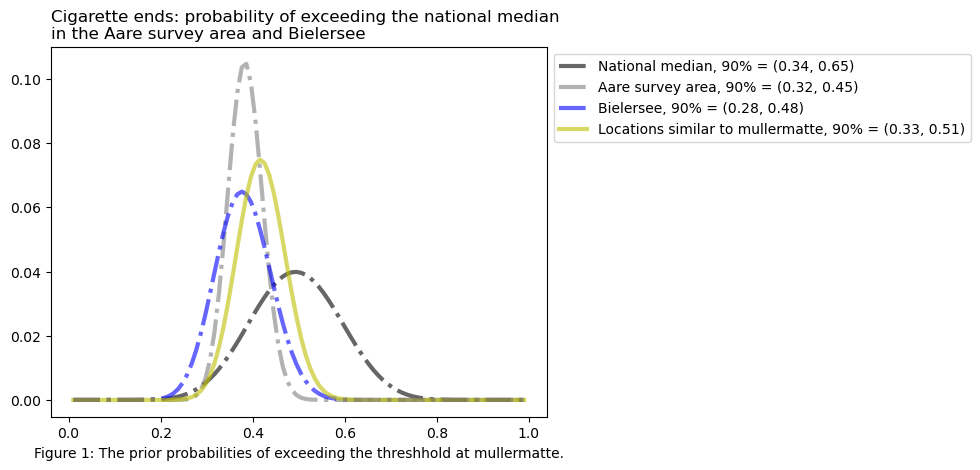

In [14]:
# calculating the probability of exceeding the threshold

def minimize_alpha_beta_beta(x, mu, var):
    
    alpha, beta = x[0], x[1]
        
    # define the mean and variance in terms of the parameters
    # mean or mu
    m = alpha/(alpha+beta)    
    
    # standard deviation
    v =  (alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1))
    
    return [m - mu, v - var]

def getAlphaBeta(mu, sigma):
    
    alpha = mu**2 * ((1 - mu) / sigma**2 - 1 / mu)

    beta = alpha * (1 / mu - 1)

    return alpha, beta

def update_alpha_beta_for_a_code(data, scale: bool=True, start_scale = [1, 1]):
    
    k, n = data    
    mu = data[0]/data[1]
    
    if mu == 0:
        mu = 0.0001
    var = (data[0]*(data[1] - data[0]))/((data[0] + (data[1]-data[0]))**2*(data[0] + (data[1]-data[0]) + 1))
    
    if var < 0.01:
        var = 0.01
    a, b = getAlphaBeta(mu, var) 
    
    kscaled, nscaled = optimize.root(minimize_alpha_beta_beta, start_scale, args=(mu, var)).x
    
    return k,n, kscaled, nscaled, a,b, mu, var

def make_beta(k, n_minus_k):
    """Makes a beta object."""
    dist = beta(k, n_minus_k)
    dist.alpha = k
    dist.beta = n_minus_k
    return dist

def update_beta(prior, data):
    """Update a beta distribution."""
    k, n_minus_k = data
    alpha = prior.alpha + k
    beta = prior.beta + n_minus_k
    return make_beta(alpha, beta)

# probability of exceeding the threshold for all data
xs = np.linspace(0.01, 0.99, 100)

# a uniform prior distribution
a_prior = make_beta(1, 1)

# threshhold
thold = df[df.code == "G27"].pcs_m.median()
obs_all = df[(df.code == "G27")&(df.pcs_m >= thold)]
obs_all_k = obs_all.loc_date.nunique()
obs_all_n = df.loc_date.nunique()

# the results for all the data
observed_alpha, observed_beta = all_data.k.sum(), all_data.n.sum()
k,n, kscaled, nscaled, a,b, mu, var = update_alpha_beta_for_a_code((observed_alpha, observed_beta))
prior_beta = update_beta(a_prior, (kscaled, nscaled))

# beta_all = update_beta(prior_beta, (obs_all_k, obs_all_n - obs_all_k))
yprior = [prior_beta.pdf(x) for x in xs]

# probability of exceeding the threshold for the survey area
# the results from all similar locations with the same land use values
observed_alpha, observed_beta = r_bas.k.sum(), r_bas.n.sum()
k,n, kscaled, nscaled, a,b, mu, var = update_alpha_beta_for_a_code((observed_alpha, observed_beta))
rbass_probs = update_beta(prior_beta, (kscaled, nscaled))

# the observed samples
locations = df[df.river_bassin == survey_area].location.unique()
observed_alpha, observed_beta = tested.loc[locations].k.sum(), tested.loc[locations].n.sum()
k,n, kscaled, nscaled, a,b, mu, var = update_alpha_beta_for_a_code((observed_alpha, observed_beta))
rbass_probs = update_beta(rbass_probs, (k, n-k))
yrbass = [rbass_probs.pdf(x) for x in xs]

# probability of exceeding the threshhold for the lake
# the results from all similar location with the same land use value
# the prior we are using here is jefferies prior
observed_alpha, observed_beta = feature.k.sum(), feature.n.sum()
k,n, kscaled, nscaled, a,b, mu, var = update_alpha_beta_for_a_code((observed_alpha, observed_beta))
lake_probs = update_beta(a_prior, (kscaled, nscaled))

# the observed samples
locations = df[df.feature == a_feature].location.unique()
observed_alpha, observed_beta = tested.loc[locations].k.sum(), tested.loc[locations].n.sum()
k,n, kscaled, nscaled, a,b, mu, var = update_alpha_beta_for_a_code((observed_alpha, observed_beta))
lake_probs = update_beta(lake_probs, (k, n-k))
y1 = [lake_probs.pdf(x) for x in xs]

# probability of exceeding the threshhold for similar locations
# the results from all similar location with the same land use value
# the prior is the results from the lake 
observed_alpha, observed_beta = location.k.sum(), location.n.sum()
k,n, kscaled, nscaled, a,b, mu, var = update_alpha_beta_for_a_code((observed_alpha, observed_beta))
location_probs = update_beta(lake_probs, (kscaled, nscaled))
y2 = [location_probs.pdf(x) for x in xs]

fig, ax=plt.subplots()

yprior_e = tuple(np.round(prior_beta.interval(.9), 2))
rbas_prior = tuple(np.round(rbass_probs.interval(.9), 2))
lake_prior = tuple(np.round(lake_probs.interval(.9), 2))
location_prior = tuple(np.round(location_probs.interval(.9), 2))


ax.set_title("Cigarette ends: probability of exceeding the national median\nin the Aare survey area and Bielersee", loc='left')

ax.plot(xs, yprior/sum(yprior), 'black', linestyle='-.', lw=3, alpha=0.6, label=f'National median, 90% = {yprior_e}')
ax.plot(xs, yrbass/sum(yrbass), 'gray', lw=3, linestyle='-.', alpha=0.6, label=f'Aare survey area, 90% = {rbas_prior}')
ax.plot(xs, y1/sum(y1), 'b', lw=3, linestyle='-.', alpha=0.6, label=f'Bielersee, 90% = {lake_prior}')
ax.plot(xs, y2/sum(y2), 'y-', lw=3, alpha=0.6, label=f'Locations similar to mullermatte, 90% = {location_prior}')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

caption = "Figure 1: The prior probabilities of exceeding the threshhold at mullermatte."

ax.set_xlabel(caption)

plt.show()

In [15]:
def make_distribution(data, prior, scaled: bool = True):
    
    observed_alpha, observed_beta = data.k.sum(), data.n.sum()
    k,n, ascaled, bscaled, a,b, mu, var = update_alpha_beta_for_a_code((observed_alpha, observed_beta))
    
    if scaled:
        # recall optimizing returns the paramaters for 
        # the beta distribution
        # a_beta = update_beta(prior, (ascaled, bscaled))
        alpha = prior.alpha + ascaled
        beta = prior.beta + bscaled
        a_beta = make_beta(alpha, beta)
        
    else:
        # a_beta = update_beta(prior, (k, n-k))
        alpha = prior.alpha + k
        beta = prior.beta + (n - k)
        a_beta = make_beta(alpha, beta)
    
    return a_beta

def assign_k_and_n(df, land_use_keys, code, limit: float = None):
    t_test = df[df.code == code].copy()
    
    if limit is None:
        threshhold = t_test.pcs_m.median()
    else:
        threshhold = limit

    tested = luse.test_one_object(t_test, threshhold, "location")
    
    fi = n_and_k_for_a_set_of_landuse_data(tested, land_use_keys)
    id_columns = ["location", "river_bass", "feature"]
    mag_cols = ["scaled"]
    merge_columns = ["use", "binned"]

    test_nk = land_use_keys[[*id_columns,*mag_cols, *merge_columns]].merge(fi, how="inner", on=merge_columns)
    
    return test_nk, tested, threshhold
    

def make_expected_probs(data, prior_data, a_prior, scaled_prior, scaled_expected):
    
    # the prior is the beta distriution of
    # the results for for all locations/regions whose
    # land-use magnitude is in the same quantile as the
    # location/rgeion in questions
    prior_probs = make_distribution(prior_data, a_prior, scaled=scaled_prior)
    
    # the poeterior 
    # probability of exceeding the threshhold for the location in question
    # the prior is the location probabilities
    expected_probs = make_distribution(data, prior_probs, scaled=scaled_expected)
    
    return expected_probs

class TestedCodeAndLandUseValues:
    
    def __init__(self, df, land_use_keys, tested, survey_area, code, prior, threshhold: float = None):
        self.land_use = land_use_keys
        self.df = df
        self.survey_area = survey_area
        self.prior = prior
        self.code = code
        self.threshhold = threshhold
        self.tested = tested
        self.land_use_tested = land_use_keys
        self.locations = self.df[self.df.river_bassin == self.survey_area].location.unique()
        self.beta = None
        self.feature_probs = None
        
        
    def make_expected_probs(self, data: pd.DataFrame = None, prior_data: pd.DataFrame = None, a_prior: scipy.stats.beta = None,
                            scaled_prior: bool = True, scaled_expected: bool = False):        
    
        # the prior is a beta distribution
        # prior data is the record of n and k for all similar land-use 
        # values for the region and code, this is the prior
        # for the expected probabilities
        prior_probs = make_distribution(prior_data, a_prior, scaled=scaled_prior)

        # the posterior is a beta distribution
        # data is the actual results for the code and region
        expected_probs = make_distribution(data, prior_probs, scaled=scaled_expected)

        return expected_probs
    
    def make_feature_probs(self, scaled_prior: bool=True, scaled_expected: bool=False):
        
        # returns the beta distribution for each feature in the survey area
        # includes the cumulative results for comparable land-use features        
        
        features = self.df[self.df.river_bassin == self.survey_area].feature.unique()
        
        feature_probs = {}
        for feature in features:
                        
            locations = self.df[self.df.feature == feature].location.unique()
            mask = self.land_use_tested.location.isin(locations)            
            
            kwargs = {
                "data":self.tested.loc[locations],
                "prior_data": self.land_use_tested[mask].drop_duplicates(["use", "binned"]),
                "a_prior":self.prior,
                "scaled_prior":scaled_prior,
                "scaled_expected":scaled_expected
            }
            
            a_beta_dist = self.make_expected_probs(**kwargs)
            feature_probs.update({feature: a_beta_dist})
            
        self.feature_probs = feature_probs
            
            
class LocationCodeAndLandUseValues:
    
    def __init__(self, prior: scipy.stats.beta = None, lake_probs: scipy.stats.beta = None, land_use_tested: pd.DataFrame = None,
                df: pd.DataFrame = None, tested: pd.DataFrame = None, feature: str = None, code: str = None):
        self.prior = prior
        self.lake_probs = lake_probs,
        self.land_use_tested = land_use_tested
        self.df = df
        self.feature = feature
        self.locations = self.df[self.df.feature == self.feature].location.unique()
        self.code = code
        self.tested = tested
        self.beta = None
        self.section_probs = None
        self.section_priors = None
        
        
    def make_expected_probs(self, data: pd.DataFrame = None, prior_data: pd.DataFrame = None, a_prior: scipy.stats.beta = None,
                            scaled_prior: bool = True, scaled_expected: bool = False):        
    
        # the prior is a beta distribution
        # prior data is the record of n and k for all similar land-use 
        # values for the region and code, this is the prior
        # for the expected probabilities
        prior_probs = make_distribution(prior_data, a_prior, scaled=scaled_prior)
        

        # the posterior is a beta distribution
        # data is the actual results for the code and region
        expected_probs = make_distribution(data, prior_probs, scaled=scaled_expected)

        return expected_probs, prior_probs
    
    def make_section_probs(self, scaled_prior: bool=True, scaled_expected: bool=False, section: str = "location"):
        
        # returns the beta distribution for each feature in the survey area
        # includes the cumulative results for comparable land-use features
        # probability of exceeding the threshhold for similar locations
        # the results from all similar location with the same land use value
        # the prior is the results from the lake 
                
        sections = self.df[self.df.feature == self.feature][section].unique()
        
        section_probs = {}
        section_priors = {}
        for a_section in sections:
                        
            locations = self.df[self.df[section] == a_section].location.unique()
            mask = self.land_use_tested.location.isin(locations)            
            
            kwargs = {
                "data":self.tested.loc[locations],
                "prior_data": self.land_use_tested[mask].drop_duplicates(["use", "binned"]),
                "a_prior":self.prior,
                "scaled_prior":scaled_prior,
                "scaled_expected":scaled_expected
            }
            # expected_probs = make_distribution(data, prior_probs, scaled=scaled_expected)
            a_beta_dist, prior_beta = self.make_expected_probs(**kwargs)
            section_probs.update({a_section: a_beta_dist})
            section_priors.update({a_section: prior_beta})
            
        self.section_probs = section_probs
        self.section_priors = section_priors
        
    def make_section_summary(self):
        sections = self.section_probs.keys()
        section_int_90 = {x:self.section_probs[x].interval(.9) for x in sections}
        section_samples = {x:self.tested.loc[x, "n"] for x in sections}
        section_exceed = {x:self.tested.loc[x, "k"] for x in sections}
        section_mean = {x:self.section_probs[x].mean() for x in sections}
        section_priors = {x:self.section_priors[x].mean() for x in sections}

        summary = []
        labels = ["n", "k", "post", "prior"]
        for i, a_column in enumerate([section_samples, section_exceed, section_mean, section_priors]):
            adf = pd.DataFrame(index=a_column.keys(), data=list(a_column.values()), columns=[labels[i]])
            summary.append(adf)

        section_summary = pd.concat(summary, axis=1)

        return section_summary, section_int_90

def probability_of_survey_area(codes, df, land_use_keys, survey_area, limit=None):
    dists = []
    for code in codes:
        # the distribution for each code is separate
        results = {}
        
        land_use_keys, tested, threshhold = assign_k_and_n(df, land_use_keys, code, limit=limit)
        # a prior
        prior = make_beta(1, 1)
        
        # p for all features in the survey area
        y = TestedCodeAndLandUseValues(df, land_use_keys, tested, survey_area, code, prior, threshhold=threshhold)
        y.make_feature_probs(scaled_expected=False)
        
        # hold results for survey area
        results.update({survey_area:y})
        
        # p for each feature in the survey area
        for a_feature in y.feature_probs.keys():
            kwargs = {
                "prior": prior,
                "lake_probs": y.feature_probs[a_feature],
                "land_use_tested": y.land_use_tested,
                "feature":a_feature,
                "df":df,
                "tested": y.tested,
                "code":code
                }

            yi = LocationCodeAndLandUseValues(**kwargs)
            yi.make_section_probs()
            results.update({a_feature:yi})

        dists.append(results)
    return dists

def feature_summary(sa_x, survey_area):
    
    sa_y = sa_x[survey_area]
    fs = sa_y.feature_probs.keys()
    sa_y_probs = sa_y.feature_probs
    row = {x:sa_y_probs[x].mean() for x in fs}
    row.update({'code':sa_y.code})
    return row

def survey_area_summary(sa, survey_area):
    
    results = {}
    for i,n in enumerate(sa):
        d = n[survey_area].land_use_tested
        d = d[d.location.isin(n[survey_area].locations)]
        d = d.drop_duplicates(["use", "binned"])
        prior = beta(1, .1)
        prior.alpha = 1
        prior.beta = 1
        # y_prior =  make_distribution(d, prior)
        
        obs = n[survey_area].tested.loc[n[survey_area].locations]
        
        # y = make_distribution(obs, y_prior)
        y = make_expected_probs(obs, d, prior, False, False)
        results.update({n[survey_area].code:y.mean()})
    return results
    
        
def collect_feature_summary(sa, survey_area):
    
    rows = []
    for a_result in sa:
        row = feature_summary(a_result, survey_area)
        rows.append(row)
    return rows
def collect_section_probs(yi, lake):
    yii_section_probs = yi[lake].section_probs
    mean_prob = {k: v.mean() for k, v in yii_section_probs.items()}
    return mean_prob

def collect_section_priors(yi, lake):
    yii_section_probs = yi[lake].section_priors
    mean_prob = {k: v.mean() for k, v in yii_section_probs.items()}
    return mean_prob

def section_summary(yi, code: str = None):
    
    lakes = list(yi.keys())
    results = []
    for aLake in lakes[1:]:
        results.append({code:collect_section_probs(yi, aLake)})
    dfy = pd.concat([pd.DataFrame(x.values()).T for x in results])
    dfy.rename(columns={0:code}, inplace=True)
    dfy = dfy.fillna(.001)
    return dfy

def section_priors(yi, code: str = None):
    
    lakes = list(yi.keys())
    results = []
    for aLake in lakes[1:]:
        results.append({code:collect_section_priors(yi, aLake)})
    dfy = pd.concat([pd.DataFrame(x.values()).T for x in results])
    dfy.rename(columns={0:code}, inplace=True)
    dfy = dfy.fillna(.001)
    return dfy
        

def section_results(y, survey_area):
    dfs = []
    dfs_p = []
    for code_result in y:
        dfs.append(section_summary(code_result, code=code_result[survey_area].code))
        dfs_p.append(section_priors(code_result, code=code_result[survey_area].code))
    return dfs, dfs_p

## Testing a threshold: Survey area

The calculations in the preceeding examples are repeated for each location and object of interest. For the following examples a subset of objects is considered, table 13.

In [16]:
# test the survey results of an object of interest
# against a threshhold

survey_area = 'aare'
codes = ["G27", "G30", "Gfrags", "Gfoam", "G89", "G112", "G67", "G70", "G95", "G96", "G100", "G98", "G177", "G200"]
aare = probability_of_survey_area(codes, df, lusek_copy, survey_area)

caption = "<b>Table 13:</b>The objects of interest and the median pieces per meter from the national survey"

threshholds= df[df.code.isin(codes)].groupby("code").pcs_m.median()

tholds = pd.DataFrame(threshholds).T
amin, amax = tholds.min().min(), tholds.max().max()
tholds = tholds.style.format(precision=3).background_gradient(vmin=amin, vmax=amax, cmap='YlOrBr').set_table_styles(table_css_styles).set_caption(caption)  
tholds

code,G100,G112,G177,G200,G27,G30,G67,G70,G89,G95,G96,G98,Gfoam,Gfrags
pcs_m,0.000,0.000,0.010,0.040,0.250,0.110,0.050,0.000,0.020,0.020,0.000,0.000,0.070,0.230


### The chance of exceeding the threshold at each lake and survey area

Remark: Values greater than 0.5 are not anticipated given the results from table 9 and table 10.

In [17]:
sa = aare.copy()        
survey_area = 'aare'

t = survey_area_summary(sa, survey_area)
sarea = pd.DataFrame(index=t.keys(), data=t.values(), columns=['aare'])

summary = collect_feature_summary(sa, survey_area)
lakes_summary = pd.DataFrame(summary).fillna(0.001)
ls = lakes_summary[[lakes_summary.columns[-1], *lakes_summary.columns[:-1]]]
ls.set_index("code", drop=True, inplace=True)
ls = pd.concat([ls, sarea], axis=1)

low, high = ls.min().min(), ls.max().max()
caption = "<b>Table 14:</b> The probability of exceeding the threshhold for the objects of interest at the different lakes in the Aare survey area"
ls.style.format(precision=2).background_gradient(axis=None, vmin=low, vmax=high, cmap='YlOrBr').set_table_styles(table_css_styles).set_caption(caption)  

,neuenburgersee,thunersee,bielersee,brienzersee,aare
G27,0.41,0.40,0.38,0.48,0.48
G30,0.34,0.36,0.60,0.51,0.48
Gfrags,0.39,0.40,0.66,0.59,0.50
Gfoam,0.33,0.54,0.48,0.55,0.48
G89,0.33,0.35,0.55,0.50,0.46
G112,0.37,0.17,0.51,0.40,0.35
G67,0.34,0.47,0.63,0.60,0.50
G70,0.17,0.18,0.21,0.38,0.24
G95,0.35,0.30,0.46,0.55,0.44
G96,0.23,0.14,0.18,0.24,0.20


### The chance of exceeding the threshold at each location on a lake

Bielersee has the highest probability of exceeding the threshhold for most objects. The same method can be applied to determine the probability for the different survey locations at Bielersee.

In [18]:
lake_locations, lake_priors = section_results(sa, survey_area)
lake_locations = pd.concat(lake_locations, axis=1)
lake_priors = pd.concat(lake_priors, axis=1)
alake = lake_locations.loc[df[df.feature == 'bielersee'].location.unique()]
# threshholds= df[df.code.isin(codes)].groupby("code").pcs_m.median()
alake.sort_index(inplace=True)
alake = alake[codes]
row_start = alake.loc["mullermatte"]
row_start.name = "expected"
low, high = alake.min().min(), alake.max().max()
caption = "<b>Table 15:</b> The probability of exceeding the threshhold at different locations on Bielersee"
alake.style.format(precision=2).background_gradient(vmin=low, vmax=high, cmap='YlOrBr').set_table_styles(table_css_styles).set_caption(caption)

,G27,G30,Gfrags,Gfoam,G89,G112,G67,G70,G95,G96,G100,G98,G177,G200
bielersee_vinelz_fankhausers,0.32,0.58,0.66,0.44,0.60,0.50,0.63,0.19,0.42,0.32,0.30,0.24,0.43,0.55
camp-des-peches,0.48,0.52,0.50,0.53,0.51,0.34,0.55,0.27,0.45,0.23,0.32,0.28,0.42,0.47
erlach-camping-strand,0.49,0.45,0.51,0.47,0.45,0.33,0.48,0.25,0.46,0.22,0.30,0.27,0.40,0.47
gals-reserve,0.44,0.49,0.51,0.45,0.44,0.32,0.47,0.24,0.46,0.22,0.30,0.30,0.43,0.48
ligerz-strand,0.48,0.50,0.53,0.49,0.43,0.31,0.49,0.24,0.45,0.21,0.34,0.26,0.43,0.48
luscherz-plage,0.41,0.40,0.45,0.41,0.46,0.38,0.49,0.26,0.37,0.18,0.31,0.24,0.40,0.52
luscherz-two,0.46,0.44,0.47,0.45,0.44,0.34,0.47,0.25,0.41,0.21,0.30,0.27,0.41,0.47
mullermatte,0.62,0.61,0.68,0.64,0.54,0.50,0.66,0.30,0.59,0.14,0.37,0.38,0.64,0.46
nidau-strand,0.50,0.52,0.53,0.46,0.51,0.39,0.52,0.26,0.45,0.23,0.33,0.29,0.50,0.53
strandboden-biel,0.48,0.54,0.48,0.49,0.48,0.42,0.51,0.29,0.46,0.27,0.31,0.28,0.51,0.50


### Details: the location that has the highest probability

How expectations change when you consider the results from similar locations.

1. Observed = n/k for the location only
2. Prior = the mean of the Beta distribution from all locations with similar land use
3. expected = The posterior distribution given the observed data and the prior

In [19]:
alakep = lake_priors.loc[df[df.feature == 'bielersee'].location.unique()]

alakep.sort_index(inplace=True)
alakep = alakep[codes]
row_two = alakep.loc["mullermatte"]
row_two.name = "prior"

low, high = alake.min().min(), alake.max().max()

nks = []
for code in codes:
    t_test = df[(df.location.isin(alake.index))&(df.code == code)].copy()
    threshhold = df[(df.code == code)].pcs_m.median()
    nk = luse.test_one_object(t_test, threshhold, "location")
    nk[code] = nk["k/n"]
    nks.append(nk[code])
n_k_s = pd.concat(nks, axis=1)

row_one = n_k_s.loc["mullermatte"]
row_one.name = "observed"

detail = pd.concat([row_one, row_two, row_start], axis=1).T
dd = detail.style.format(precision=2).background_gradient(vmin=low, vmax=high, cmap='YlOrBr')
caption = "<b>Table 16:</b> The probability of exceeding the threshhold at mullermatte for the objects of interest. Detail of likelihood, prior and expected results"
dd.set_table_styles(table_css_styles).set_caption(caption)

,G27,G30,Gfrags,Gfoam,G89,G112,G67,G70,G95,G96,G100,G98,G177,G200
observed,0.83,0.83,1.00,0.92,0.67,0.75,0.92,0.33,0.83,0.00,0.42,0.50,1.00,0.42
prior,0.52,0.51,0.53,0.52,0.49,0.38,0.53,0.28,0.47,0.23,0.34,0.31,0.48,0.48
expected,0.62,0.61,0.68,0.64,0.54,0.50,0.66,0.30,0.59,0.14,0.37,0.38,0.64,0.46


## Effects of land use

__Recall:__ We are trying to determine whether or not the probability of exceeding the threshold for one object changes under different land-use conditions. Each location presents a unique land use profile. Each land use profile has different values for n and k, because the magnitude of the land use attributes is different.

The magnitudes of all land-use attributes have been scaled and grouped (binned) by intervals of 0.05, (zero is its own group). Therefore, there are 21 total bins, bin one is for the case where the land-use attribute is not within a location hex (zero). Bin 2 contains locations whose magnitudes are 0.0 < x < 0.05 of the total, the last bin contains the locations with the highest proportion of an attribute, .95 < x </= 1. 

We assume that locations with similar land-use attributes have similar survey results. Therefore each bin contains the record of n and k for all the locations where the magnitude of the land use attribute is similar. Specifically the maximum difference in magnitude between elements of a bin is the limits of the bin itself. For example bin two of Forests contains the survey results for all locations that are within 5th and 10th percentile for all locations.

In [20]:
lu_sa_g = sa[0]["aare"]
sa_tested = sa[0]["aare"].tested.copy()
locations = lu_sa_g.locations
lusea = lu_sa_g.land_use_tested
# lusea["observed"] = lusea["k"]/lusea["n"]
# OBS = lusea[["location","observed"]].set_index("location")

G27 = lake_locations["G27"]
OBS = sa_tested["k/n"]
Ks = sa_tested["k"]
Ns = sa_tested["n"]

binmap = lusea[lusea.location.isin(locations)][["location","use", "binned", "scaled","k", "n"]].set_index("location", drop=True)
binmap["p"] = binmap.index.map(lambda x: G27.loc[x])
binmap["o-p"] = binmap.index.map(lambda x: OBS.loc[x])
binmap["o-k"] = binmap.index.map(lambda x: Ks.loc[x])
binmap["o-n"] = binmap.index.map(lambda x: Ns.loc[x])

observed = binmap[["use", "binned","scaled", "o-k", "o-n"]].copy()
observed = observed.rename(columns={"o-k":"k", "o-n":"n"})

def effect(d, split: int = 10,):
    
       
    vals = np.sort(d["scaled"].values)
    amin, amax = np.min(vals), np.max(vals)

    
    # remove the largest value before splitting the data
    rng = vals[vals < amax]
    
    a_min, a_max = np.min(rng), np.max(rng)
    
    mid_point = (amin+a_max)/2
    
    l_than = d[d.scaled < mid_point]
    g_than = d[d.scaled >= mid_point]
    
    less_than_r = l_than.k.sum(), l_than.n.sum()
    g_than_r = g_than.k.sum(), g_than.n.sum()
    
    return {
        "less than": mid_point,
        "set one k and n":less_than_r,
        "greater than":mid_point,
        "set two k and n": g_than_r}

### Determining the effect

From table 9 the expectation of exceeding the threshhold in the Aare survey area is low. This is confirmed by the results in the national survey, the Aare exceeded the threshhold for two objects: i. Fragmented plastics and ii. Industrial sheeting. Furthermore from fig 3.9 of the federal report there is most likely a positive monotonic relationship between the density of fragmented platsics and the magnitude of recreational usage and the length of the road network. 

To determine the effect on observed (and future) results k and n are considered from the perspective of land use alone. Recall that table 9 summarizes expectations based on the n and k for a set of land use attributes, indifferent of location. By separating each land use attribute in to two sections, n and k can be compared for the subsets. Therfore to determine the effects of land use each land-use categories is separated into two groups by magnitude. The midpoint is defined by considering the distance from the lowest recorded magnitude to the second highest recorded magnitude. 

* group one = locations with land-use attributes less than the midpoint
* group two = locations with land-use attributes >= the midpoint

This operation is performed for each object and land-use combination. Figure two demonstrates this operation for cigarette ends and the magnitudes of forest and street length in the Aare survey area. In both cases the subset with the highest magnitude has an increased probability of exceeding the threshhold. However, only one is likely to exceed the the threshhold more than 50% of the time.

* group one: blue rectangle = the 90% interval of the results where the magnitude was less than the midpoint
* group two: pink rectangle = the 90% interval of the results where the magnitude was greater than the midpoint

In [21]:
def survey_area_p(data, prior_data, a_prior, limit):
    
    d_less = data[data.scaled < limit]
    d_greater = data[data.scaled >= limit]
    
    p_less = prior_data[prior_data.scaled < limit]
    p_greater = prior_data[prior_data.scaled >= limit]

    # beta less
    
    wl_beta = make_expected_probs(d_less, p_less, a_prior, True, False)
    wl_int = wl_beta.interval(.9)
    wl_mean = wl_beta.mean()
          
    wg_beta = make_expected_probs(d_greater, p_greater, a_prior, True, False)
    wg_int = wg_beta.interval(.9)
    wg_mean = wg_beta.mean()
    
    return wl_beta, wl_int, wl_mean, wg_beta, wg_int, wg_mean
    

def effect_or_not(ci_high, ci_low):
    high, low = 0, 0
    
    if ci_high[2] - ci_low[2] < 0:
        # the highest probability of exceeding the threshhold is from
        # lowest land-use values. The minimum  of the 90% interval 
        # from low scale values is higher than the minimum of the 90% interval from
        # the high scale values. 
        if ci_low[0] >= 0.5:
            # the entire distribution of low scale values
            # is higher than 0.5, chance is > 1/2
            # of exceeding the threshhold
            rho = ci_low[2]
            direction = -1        
        else:
            
            if ci_low[1] >= 0.5:
                
                # the 90% interval straddels the threshold
                # and it is greater than the high scale 
                # there is a 1/2 chance of exceeding
                if ci_high[1] >= 0.5:
                    # they both straddle 0.5
                    # but there is a higher probability
                    # of exceeding the thresshhold with
                    # samples from the lower scales
                    rho = 0
                    direction = -1
                else:
                    # only the low scale values pass 
                    # then the it is inversely related
                    rho = ci_low[2]
                    direction = -1
            
            else:
                # the 90% interval is lower than the threshold
                # not likely
                rho = ci_low[2]
                direction = -1
    
    if ci_high[2] - ci_low[2] > 0:
        
        # the high scale values have a higher probability
        if ci_high[0] >= 0.5:
            # higher probability at higher values
            # assign a color or scale
            # chance is > 1/2 of exceeding the threshhold
            rho = ci_high[2]
            direction = 1  
        else:
            if ci_high[1] >= 0.5:
                # the 90% interval stradels the threshold
                if ci_low[1] >= 0.5:
                    # they both straddle 0.5
                    # but there is a higher probability
                    # of exceeding the thresshhold with
                    # samples from the lower scales
                    rho = 0
                    direction = 1
                else:
                    # only the high scale values pass the p=0.5
                    rho = ci_high[2]
                    direction = 1
            else:
                # the 90% interval is lower than the threshold
                # not likely
                rho = ci_high[2]
                direction = 1
    
    
    if ci_high[2] - ci_low[2] == 0:
        print("passed")
        rho = 0
        direction = 1     
                
    return rho, direction


def determine_land_use_effect(data, prior_data, prior, midpoint):
    wl_beta, wl_int, wl_mean, wg_beta, wg_int, wg_mean = survey_area_p(data, prior_data, prior, midpoint)
    ci_high = [*wg_int, wg_mean]
    ci_low = [*wl_int, wl_mean]
    
    effect = effect_or_not(ci_high, ci_low)
    
    return effect, ci_low, ci_high

def collect_land_use_distributions(binmap):
    the_effects = {}
    for ause in binmap.use.unique():
        data = binmap[binmap.use.isin([ause])].drop_duplicates(["use", "binned"])
        
        observed = binmap[["use", "binned","scaled", "o-k", "o-n"]].copy()
        observed = observed.rename(columns={"o-k":"k", "o-n":"n"})

        data_o = observed[observed.use.isin([ause])]
        
        scaled_min, scaled_max = data_o.scaled.min(), data_o.scaled.max()
        data_o_scales = data_o.scaled.values
        a_prior = beta(1, 1)
        a_prior.beta = 1
        a_prior.alpha = 1
        if scaled_max != 0:
            scaled_m = data_o_scales[data_o_scales < scaled_max].max()
            midpoint = (scaled_min+scaled_m)/2
            an_effect = determine_land_use_effect(data_o, data, a_prior, midpoint)
            the_effects.update({ause:an_effect[0][0]*an_effect[0][1]})
        else:
            pass      
        
    return the_effects

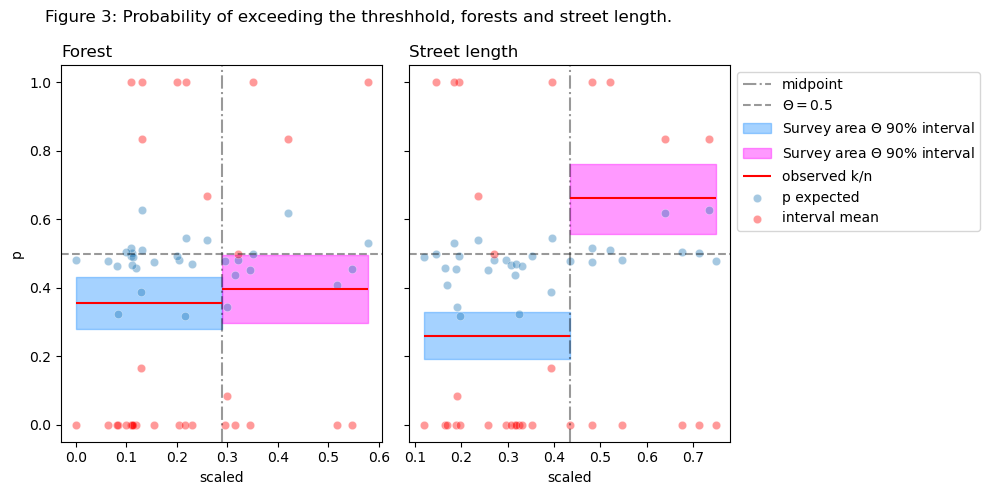

In [22]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(10, 5))

data = binmap[binmap.use.isin(["Wald"])].drop_duplicates(["use", "binned"])
data_plot = binmap[binmap.use.isin(["Wald"])]
data_o = observed[observed.use.isin(["Wald"])]
an_effect = effect(data_o)

scaled_min, scaled_max = data_o.scaled.min(), data_o.scaled.max()
midpoint = (scaled_min+scaled_max)/2

a_prior = beta(1, 1)
a_prior.alpha = 1
a_prior.beta = 1

wl_beta, wl_int, wl_mean, wg_beta, wg_int, wg_mean = survey_area_p(data_o, data, a_prior, midpoint)

less_than_y = an_effect["set one k and n"][0]/an_effect["set one k and n"][1]
greater_than_y = an_effect["set two k and n"][0]/an_effect["set two k and n"][1]

# the limit between the two groups and the min, max
axs[0].axvline(x=midpoint, c="black", ls='-.', label="midpoint", alpha=0.4)

# p = 0.5
axs[0].axhline(y=0.5, ls='--', c="black", label="$\Theta = 0.5$", alpha=0.4)
# p survey area
axs[0].fill_between(x=[scaled_min, midpoint] , y1=wl_int[0], y2=wl_int[1], label="Survey area $\Theta$ 90% interval", color="dodgerblue", alpha=0.4)
# p survey area
axs[0].fill_between(x=[midpoint, scaled_max] , y1=wg_int[0], y2=wg_int[1], label="Survey area $\Theta$ 90% interval", color="magenta", alpha=0.4)
# the observed values of k/n prior and k/n by location in the survey area
lines = [wl_mean, wg_mean]
xmins = [scaled_min, midpoint]
xmax = [midpoint, scaled_max]

axs[0].hlines(lines, xmin=[scaled_min, midpoint], xmax=[midpoint, scaled_max], label="observed k/n", color="red")

sns.scatterplot(data=data_plot, x="scaled", y="p", ax=axs[0], label="p expected", alpha=0.4)
sns.scatterplot(data=data_o, x="scaled", y=data_o["k"]/data_o["n"], c="red", label="interval mean", ax=axs[0], alpha=0.4)

axis_0_title = "Forest"
axis_1_title = "Street length"

axs[0].set_title(axis_0_title, loc="left")
axs[1].set_title(axis_1_title, loc="left")

data = binmap[binmap.use.isin(["Strasse"])].drop_duplicates(["use", "binned"])
data_plot = binmap[binmap.use.isin(["Strasse"])]
data_o = observed[observed.use.isin(["Strasse"])]
an_effect = effect(data_o)

scaled_min, scaled_max = data_o.scaled.min(), data_o.scaled.max()
midpoint = (scaled_min+scaled_max)/2

a_prior = beta(1, 1)
a_prior.alpha = 1
a_prior.beta = 1

wl_beta, wl_int, wl_mean, wg_beta, wg_int, wg_mean = survey_area_p(data_o, data, a_prior, midpoint)

less_than_y = an_effect["set one k and n"][0]/an_effect["set one k and n"][1]
greater_than_y = an_effect["set two k and n"][0]/an_effect["set two k and n"][1]

# the limit between the two groups and the min, max
axs[1].axvline(x=midpoint, c="black", ls='-.', label="midpoint", alpha=0.4)

# p = 0.5
axs[1].axhline(y=0.5, ls='--', c="black", label="$\Theta = 0.5$", alpha=0.4)
# p survey area
axs[1].fill_between(x=[scaled_min, midpoint] , y1=wl_int[0], y2=wl_int[1], label="Survey area $\Theta$ 90% interval", color="dodgerblue", alpha=0.4)
# p survey area
axs[1].fill_between(x=[midpoint, scaled_max] , y1=wg_int[0], y2=wg_int[1], label="Survey area $\Theta$ 90% interval", color="magenta", alpha=0.4)

# the observed values of k/n prior and k/n by location in the survey area
lines = lines = [wl_mean, wg_mean]
xmins = [scaled_min, midpoint]
xmax = [midpoint, scaled_max]

axs[1].hlines(lines, xmin=[scaled_min, midpoint], xmax=[midpoint, scaled_max], label="observed k/n", color="red")

sns.scatterplot(data=data_plot, x="scaled", y="p", ax=axs[1], label="p expected", alpha=0.4)
sns.scatterplot(data=data_o, x="scaled", y=data_o["k"]/data_o["n"], c="red", label="interval mean", ax=axs[1], alpha=0.4)

axs[1].legend().remove()

h,l = axs[0].get_legend_handles_labels()
axs[0].legend().remove()
plt.legend(h,l, bbox_to_anchor=(1,1))
plt.suptitle("Figure 3: Probability of exceeding the threshhold, forests and street length.", ha="left", x=0.05)
plt.tight_layout()
plt.show()

In figure three, it is the locations with lower magnitudes of orchards and udefined land use that had the highest probability of exceeding the threshhold. However, only one group has a 50% of chance of exceeding the threshhold.

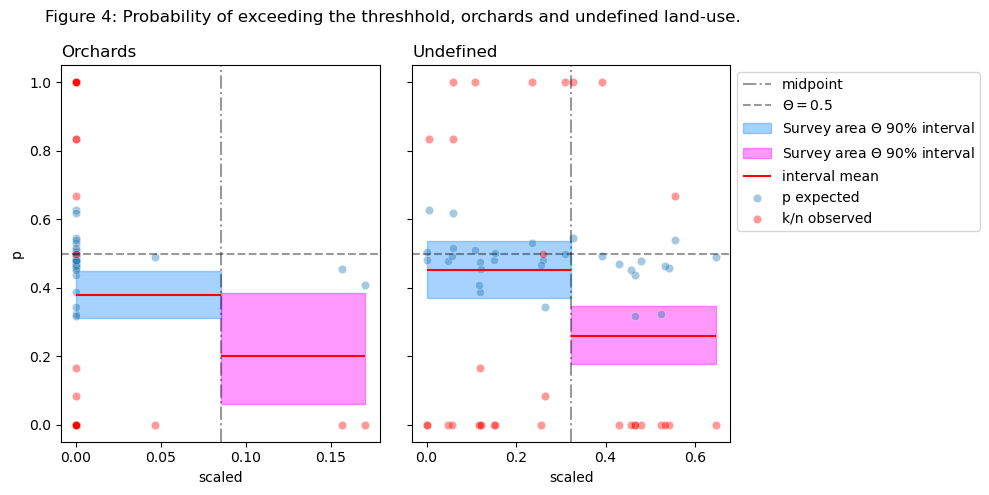

In [23]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(10, 5))

data = binmap[binmap.use.isin(["Obstanlage"])].drop_duplicates(["use", "binned"])
data_plot = binmap[binmap.use.isin(["Obstanlage"])]
data_o = observed[observed.use.isin(["Obstanlage"])]
an_effect = effect(data_o)

scaled_min, scaled_max = data_o.scaled.min(), data_o.scaled.max()
midpoint = (scaled_min+scaled_max)/2

a_prior = beta(1, 1)
a_prior.alpha = 1
a_prior.beta = 1

wl_beta, wl_int, wl_mean, wg_beta, wg_int, wg_mean = survey_area_p(data_o, data, a_prior, midpoint)

less_than_y = an_effect["set one k and n"][0]/an_effect["set one k and n"][1]
greater_than_y = an_effect["set two k and n"][0]/an_effect["set two k and n"][1]

# the limit between the two groups and the min, max
axs[0].axvline(x=midpoint, c="black", ls='-.', label="midpoint", alpha=0.4)

# p = 0.5
axs[0].axhline(y=0.5, ls='--', c="black", label="$\Theta = 0.5$", alpha=0.4)
# p survey area
axs[0].fill_between(x=[scaled_min, midpoint] , y1=wl_int[0], y2=wl_int[1], label="Survey area $\Theta$ 90% interval", color="dodgerblue", alpha=0.4)
# p survey area
axs[0].fill_between(x=[midpoint, scaled_max] , y1=wg_int[0], y2=wg_int[1], label="Survey area $\Theta$ 90% interval", color="magenta", alpha=0.4)
# the observed values of k/n prior and k/n by location in the survey area
lines = [wl_mean, wg_mean]
xmins = [scaled_min, midpoint]
xmax = [midpoint, scaled_max]

axs[0].hlines(lines, xmin=[scaled_min, midpoint], xmax=[midpoint, scaled_max], label="interval mean", color="red")

sns.scatterplot(data=data_plot, x="scaled", y="p", ax=axs[0], label="p expected", alpha=0.4)
sns.scatterplot(data=data_o, x="scaled", y=data_o["k"]/data_o["n"], c="red", label="k/n observed", ax=axs[0], alpha=0.4)

axis_0_title = "Orchards"
axis_1_title = "Undefined"

axs[0].set_title(axis_0_title, loc="left")
axs[1].set_title(axis_1_title, loc="left")

data = binmap[binmap.use.isin(["undefined"])].drop_duplicates(["use", "binned"])
data_plot = binmap[binmap.use.isin(["undefined"])]
data_o = observed[observed.use.isin(["undefined"])]
an_effect = effect(data_o)

scaled_min, scaled_max = data_o.scaled.min(), data_o.scaled.max()
midpoint = (scaled_min+scaled_max)/2

a_prior = beta(1, 1)
a_prior.alpha = 1
a_prior.beta = 1

wl_beta, wl_int, wl_mean, wg_beta, wg_int, wg_mean = survey_area_p(data_o, data, a_prior, midpoint)

less_than_y = an_effect["set one k and n"][0]/an_effect["set one k and n"][1]
greater_than_y = an_effect["set two k and n"][0]/an_effect["set two k and n"][1]

# the limit between the two groups and the min, max
axs[1].axvline(x=midpoint, c="black", ls='-.', label="midpoint", alpha=0.4)

# p = 0.5
axs[1].axhline(y=0.5, ls='--', c="black", label="$\Theta = 0.5$", alpha=0.4)
# p survey area
axs[1].fill_between(x=[scaled_min, midpoint] , y1=wl_int[0], y2=wl_int[1], label="Survey area $\Theta$ 90% interval", color="dodgerblue", alpha=0.4)
# p survey area
axs[1].fill_between(x=[midpoint, scaled_max] , y1=wg_int[0], y2=wg_int[1], label="Survey area $\Theta$ 90% interval", color="magenta", alpha=0.4)

# the observed values of k/n prior and k/n by location in the survey area
lines = lines = [wl_mean, wg_mean]
xmins = [scaled_min, midpoint]
xmax = [midpoint, scaled_max]

axs[1].hlines(lines, xmin=[scaled_min, midpoint], xmax=[midpoint, scaled_max], label="interval mean", color="red")

sns.scatterplot(data=data_plot, x="scaled", y="p", ax=axs[1], label="p expected", alpha=0.4)
sns.scatterplot(data=data_o, x="scaled", y=data_o["k"]/data_o["n"], c="red", label="k/n observed", ax=axs[1], alpha=0.4)

axs[1].legend().remove()

h,l = axs[0].get_legend_handles_labels()
axs[0].legend().remove()
plt.legend(h,l, bbox_to_anchor=(1,1))
plt.suptitle("Figure 4: Probability of exceeding the threshhold, orchards and undefined land-use.", ha="left", x=0.05)
plt.tight_layout()

plt.show()

### The effects of land-use on survey results

Table 17 displays the combined results when the calculations in figures 3 and 4 are repeated for all objects and land-use attributes in the Aare survey area.

__Legend:__

1. blue = the highest probability is from locations with land attributes less than the midpoint
2. red = the highest probability is from locations with land attributes greater than the midpoint
3. grey = the 90% interval of both blue and red straddle the 50% probability line
4. white border = the chances are greater than 1/2 of exceeding the threshhold.

#### The Aare survey area

_Limited to Neuenburgersee, Bielersee and Thunersee_

recall the threshhold values:

In [24]:
tholds

code,G100,G112,G177,G200,G27,G30,G67,G70,G89,G95,G96,G98,Gfoam,Gfrags
pcs_m,0.000,0.000,0.010,0.040,0.250,0.110,0.050,0.000,0.020,0.020,0.000,0.000,0.070,0.230


In [25]:
def land_use_effects_for_binmap(sa, survey_area):
    
    results = []
    for u in sa:
        lu = u[survey_area]
        st = lu.tested.copy()
        locations = lu.locations
        lusea = lu.land_use_tested
        binmap = lusea[lusea.location.isin(locations)][["location","use", "binned", "scaled","k", "n"]].set_index("location", drop=True)
        Ks = st["k"]
        Ns = st["n"]
        binmap["o-k"] = binmap.index.map(lambda x: Ks.loc[x])
        binmap["o-n"] = binmap.index.map(lambda x: Ns.loc[x])
        efs =collect_land_use_distributions(binmap)        
        results.append({lu.code:efs})
    
    return results
survey_area = 'aare'
luse_s = land_use_effects_for_binmap(sa, survey_area)
x = survey_area_summary(sa, "aare")
aar_s = pd.DataFrame(index=x.keys(), data=x.values(), columns=["aare"])

dfs_lu = [pd.DataFrame(x) for x in luse_s]
pd.DataFrame(luse_s[0])
adf = pd.concat(dfs_lu, axis=1)
adf = adf.T
adf = pd.concat([adf, aar_s], axis=1)
def remove_neg(x):
    if x < 0:
        new_x = round(x, 2)
        new_x = str(new_x)[1:]
    else:
        new_x = round(x, 2)
    return new_x

# def style_negative(v, props=''):
#     return props if v < 0 else None
def style_exceed(v, props=''):
    return props if abs(v) >= 0.5 else None
 
cell_borders = abs(adf) >= 0.5
cell_borders = cell_borders.astype(str)
caption = "<b>Table 17:</b> The probability of exceeding the national median by object and landuse, Aare Survey area"
adfx = adf.style.format(remove_neg, precision=2).background_gradient(vmin=-1, vmax=1, cmap='coolwarm')
table_caption = {'selector': 'caption', 'props': 'font-size: 14px; font-style: italic; caption-side: bottom; text-align: left; margin-top: 10px'}
adfx.set_table_styles([
    {'selector': '.True', 'props': 'color:white; border: 2px solid white;'},
    {'selector': '.False', 'props': 'color:gray;'},
    table_caption,
    
                      ],overwrite=False)
adfx.set_td_classes(cell_borders).set_caption(caption)


,Fels,Obstanlage,Reben,Siedl,Stadtzentr,Strasse,Sumpf,Wald,distance,infrastructure,length,recreation,undefined,aare
G27,0.49,0.38,0.41,0.54,0.64,0.66,0.39,0.4,0.46,0.53,0.49,0.48,0.45,0.48
G30,0.5,0.44,0.71,0.53,0.57,0.69,0.51,0.43,0.54,0.53,0.66,0.0,0.0,0.48
Gfrags,0.0,0.0,0.0,0.0,0.51,0.64,0.57,0.0,0.0,0.0,0.72,0.0,0.0,0.5
Gfoam,0.66,0.46,0.0,0.0,0.47,0.57,0.0,0.54,0.57,0.0,0.72,0.0,0.0,0.48
G89,0.41,0.47,0.47,0.46,0.43,0.62,0.48,0.44,0.42,0.5,0.54,0.43,0.43,0.46
G112,0.41,0.36,0.38,0.44,0.39,0.39,0.38,0.42,0.42,0.43,0.49,0.44,0.43,0.35
G67,0.0,0.0,0.0,0.0,0.0,0.72,0.56,0.0,0.59,0.0,0.66,0.0,0.0,0.5
G70,0.3,0.4,0.29,0.24,0.24,0.29,0.2,0.21,0.29,0.27,0.33,0.25,0.2,0.24
G95,0.38,0.38,0.53,0.51,0.43,0.59,0.44,0.4,0.51,0.51,0.63,0.41,0.43,0.44
G96,0.21,0.27,0.35,0.23,0.43,0.26,0.2,0.23,0.23,0.24,0.35,0.19,0.19,0.2


#### The Rhône survey area

_Limited to Le Léman_

__Legend:__

1. blue = the highest probability is from locations with land attributes less than the midpoint
2. red = the highest probability is from locations with land attributes greater than the midpoint
3. grey = the 90% interval of both blue and red straddle the 50% probability line
4. white border = the chances are greater than 1/2 of exceeding the threshhold.

The threshhold values

In [26]:
tholds

code,G100,G112,G177,G200,G27,G30,G67,G70,G89,G95,G96,G98,Gfoam,Gfrags
pcs_m,0.000,0.000,0.010,0.040,0.250,0.110,0.050,0.000,0.020,0.020,0.000,0.000,0.070,0.230


In [27]:
survey_area = 'rhone'
codes = ["G27", "G30", "Gfrags", "Gfoam", "G89", "G112", "G67", "G70", "G95", "G96", "G100", "G98", "G177", "G200"]
rhone = probability_of_survey_area(codes, df, lusek_copy, survey_area)

luse_s = land_use_effects_for_binmap(rhone, survey_area)

In [28]:
dfs_lu = [pd.DataFrame(x) for x in luse_s]
pd.DataFrame(luse_s[0])
adf = pd.concat(dfs_lu, axis=1)
x = survey_area_summary(rhone, "rhone")
rhone_s = pd.DataFrame(index=x.keys(), data=x.values(), columns=["rhone"])
adf = adf.T
adf = pd.concat([adf, rhone_s], axis=1)
cell_borders = abs(adf) >= 0.5
cell_borders = cell_borders.astype(str)
adfx = adf.style.format(remove_neg, precision=2).background_gradient(vmin=-1, vmax=1, cmap='coolwarm')
adfx.set_table_styles([
    {'selector': '.True', 'props': 'color:white; border: 2px solid white;'},
    {'selector': '.False', 'props': 'color:gray;'},
    table_caption,
    
                      ],overwrite=False)
caption = "<b>Table 18:</b> The probability of exceeding the national median by object and landuse, Rhône Survey area"
adfx.set_td_classes(cell_borders)

,Obstanlage,Reben,Siedl,Stadtzentr,Strasse,Wald,distance,infrastructure,length,recreation,undefined,rhone
G27,0.0,0.64,0.7,0.63,0.6,0.65,0.61,0.77,0.72,0.6,0.67,0.51
G30,0.66,0.68,0.69,0.67,0.77,0.67,0.69,0.93,0.73,0.65,0.67,0.51
Gfrags,0.66,0.67,0.65,0.71,0.67,0.65,0.64,0.93,0.77,0.69,0.64,0.52
Gfoam,0.0,0.72,0.68,0.66,0.66,0.76,0.62,0.0,0.69,0.66,0.67,0.49
G89,0.0,0.0,0.65,0.66,0.66,0.7,0.0,0.0,0.67,0.68,0.65,0.48
G112,0.58,0.5,0.46,0.0,0.63,0.0,0.0,0.89,0.49,0.61,0.47,0.36
G67,0.74,0.63,0.6,0.69,0.67,0.72,0.61,0.83,0.78,0.69,0.67,0.51
G70,0.49,0.0,0.56,0.52,0.55,0.0,0.0,0.0,0.49,0.56,0.0,0.26
G95,0.7,0.7,0.69,0.75,0.71,0.7,0.69,0.93,0.78,0.72,0.68,0.48
G96,0.42,0.31,0.39,0.32,0.32,0.37,0.32,0.3,0.38,0.33,0.4,0.21


### All survey results: Logistic regression

### Infrastructure

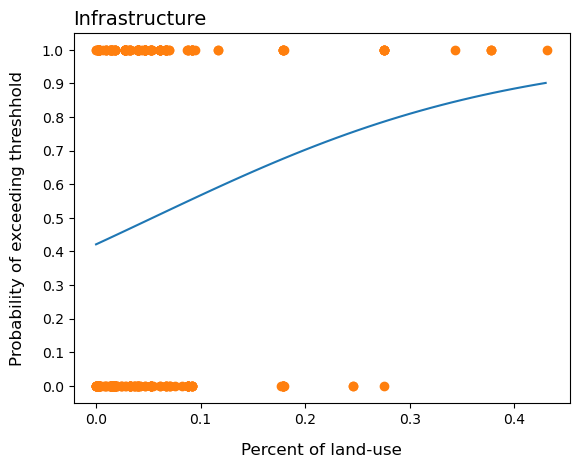

In [29]:
import statsmodels.formula.api as smf
from scipy.special import expit
aglu = lusek_copy.copy()
log_of = to_test[["location", "k"]].copy()
log_of["failed"] = log_of.k.astype(int)
log_of = log_of[["location", "failed"]]
ict = aglu[aglu.use == "infrastructure"][["location", "scaled"]].set_index("location")
ict = ict["scaled"]
log_of["infrastructure"] = log_of.location.apply(lambda x: ict.loc[x])


obj_min, obj_max = log_of.infrastructure.min(), log_of.infrastructure.max()

formula = 'failed ~ infrastructure'
results = smf.logit(formula, data=log_of).fit(disp=False)
inter = results.params['Intercept']
slope = results.params['infrastructure']
xs = np.arange(obj_min, obj_max, step=.01)

log_odds = inter + slope * xs
odds = np.exp(log_odds)

ps_x = expit(inter + slope * xs)

fig, ax = plt.subplots()

ax.plot(xs, ps_x)
ax.plot(log_of["infrastructure"], log_of["failed"], 'o')
ax.set_title("Infrastructure", fontsize=14, loc='left')

ax.set_xlabel("Percent of land-use", fontsize=12,labelpad=12)
ax.set_ylabel("Probability of exceeding threshhold", fontsize=12, labelpad=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
plt.show()

### Urbanization

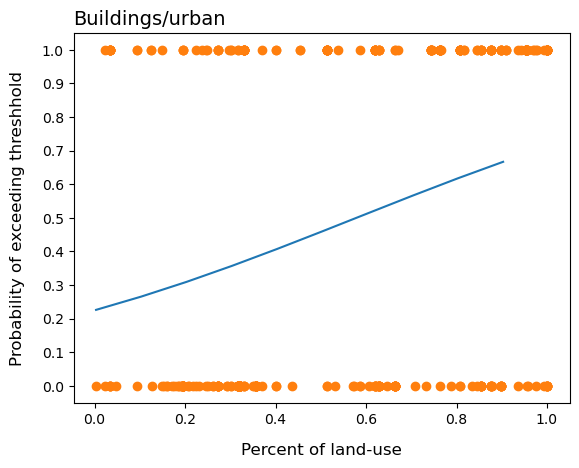

In [30]:
log_of = to_test[["location", "k"]].copy()
log_of["failed"] = log_of.k.astype(int)
log_of = log_of[["location", "failed"]]

ict = aglu[aglu.use == "Siedl"][["location", "scaled"]].set_index("location")
ict = ict["scaled"]
log_of["Siedl"] = log_of.location.apply(lambda x: ict.loc[x])

obj_min, obj_max = log_of.Siedl.min(), log_of.Siedl.max()

formula = 'failed ~ Siedl'
results = smf.logit(formula, data=log_of).fit(disp=False)
inter = results.params['Intercept']
slope = results.params['Siedl']
xs = np.arange(obj_min, obj_max, step=.1)

log_odds = inter + slope * xs
odds = np.exp(log_odds)

ps_x = expit(inter + slope * xs)

fig, ax = plt.subplots()

ax.plot(xs, ps_x)
ax.plot(log_of["Siedl"], log_of["failed"], 'o')
ax.set_title("Buildings/urban", fontsize=14, loc='left')

ax.set_xlabel("Percent of land-use", fontsize=12,labelpad=12)
ax.set_ylabel("Probability of exceeding threshhold", fontsize=12, labelpad=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
plt.show()

### Forest

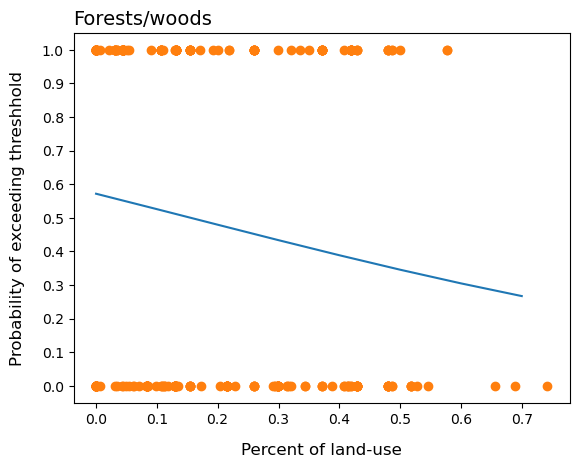

In [31]:
log_of = to_test[["location", "k"]].copy()
log_of["failed"] = log_of.k.astype(int)
log_of = log_of[["location", "failed"]]

ict = aglu[aglu.use == "Wald"][["location", "scaled"]].set_index("location")
ict = ict["scaled"]
log_of["Wald"] = log_of.location.apply(lambda x: ict.loc[x])

obj_min, obj_max = log_of.Wald.min(), log_of.Wald.max()

formula = 'failed ~ Wald'
results = smf.logit(formula, data=log_of).fit(disp=False)
inter = results.params['Intercept']
slope = results.params['Wald']
xs = np.arange(obj_min, obj_max, step=.1)

log_odds = inter + slope * xs
odds = np.exp(log_odds)

ps_x = expit(inter + slope * xs)

fig, ax = plt.subplots()

ax.plot(xs, ps_x)
ax.plot(log_of["Wald"], log_of["failed"], 'o')
ax.set_title("Forests/woods", fontsize=14, loc='left')

ax.set_xlabel("Percent of land-use", fontsize=12,labelpad=12)
ax.set_ylabel("Probability of exceeding threshhold", fontsize=12, labelpad=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
plt.show()

### Undefined

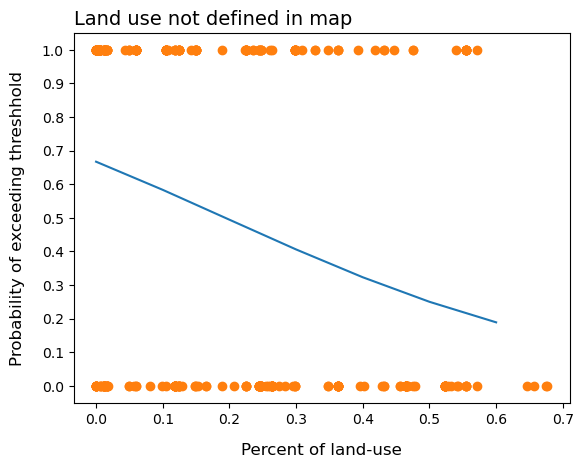

In [32]:
log_of = to_test[["location", "k"]].copy()
log_of["failed"] = log_of.k.astype(int)
log_of = log_of[["location", "failed"]]

ict = aglu[aglu.use == "undefined"][["location", "scaled"]].set_index("location")
ict = ict["scaled"]
log_of["Undefined"] = log_of.location.apply(lambda x: ict.loc[x])

obj_min, obj_max = log_of.Undefined.min(), log_of.Undefined.max()

formula = 'failed ~ Undefined'
results = smf.logit(formula, data=log_of).fit(disp=False)
inter = results.params['Intercept']
slope = results.params['Undefined']
xs = np.arange(obj_min, obj_max, step=.1)

log_odds = inter + slope * xs
odds = np.exp(log_odds)

ps_x = expit(inter + slope * xs)

fig, ax = plt.subplots()

ax.plot(xs, ps_x)
ax.plot(log_of["Undefined"], log_of["failed"], 'o')
ax.set_title("Land use not defined in map", fontsize=14, loc='left')

ax.set_xlabel("Percent of land-use", fontsize=12,labelpad=12)
ax.set_ylabel("Probability of exceeding threshhold", fontsize=12, labelpad=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
plt.show()

### Recreation

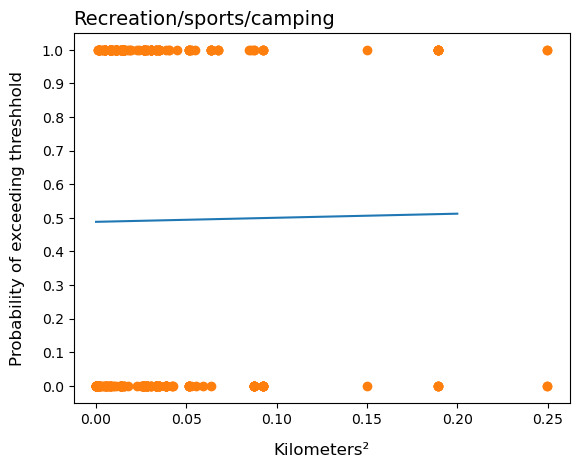

In [33]:
log_of = to_test[["location", "k"]].copy()
log_of["failed"] = log_of.k.astype(int)
log_of = log_of[["location", "failed"]]

ict = aglu[aglu.use == "recreation"][["location", "scaled"]].set_index("location")
ict = ict["scaled"]
log_of["recreation"] = log_of.location.apply(lambda x: ict.loc[x])

obj_min, obj_max = log_of.recreation.min(), log_of.recreation.max()

formula = 'failed ~ recreation'
results = smf.logit(formula, data=log_of).fit(disp=False)
inter = results.params['Intercept']
slope = results.params['recreation']
xs = np.arange(obj_min, obj_max, step=.1)

log_odds = inter + slope * xs
odds = np.exp(log_odds)

ps_x = expit(inter + slope * xs)

fig, ax = plt.subplots()

ax.plot(xs, ps_x)
ax.plot(log_of["recreation"], log_of["failed"], 'o')
ax.set_title("Recreation/sports/camping", fontsize=14, loc='left')

ax.set_xlabel("Kilometers²", fontsize=12,labelpad=12)
ax.set_ylabel("Probability of exceeding threshhold", fontsize=12, labelpad=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
plt.show()

### Distance to river intersection

_Currently being edited_

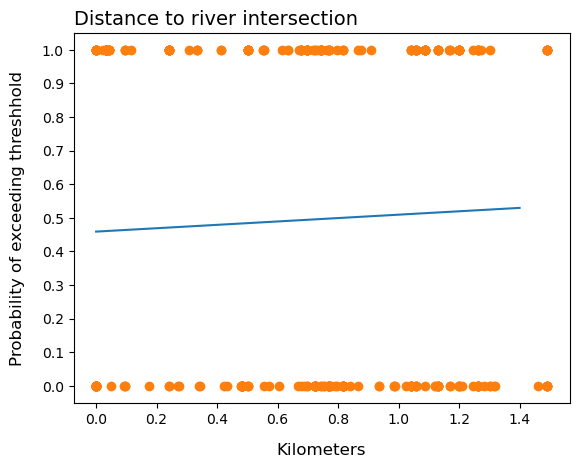

In [34]:
log_of = to_test[["location", "k"]].copy()
log_of["failed"] = log_of.k.astype(int)
log_of = log_of[["location", "failed"]]
dist_ct = pd.read_csv("resources/hex-3000m-cleaned/river-intersect-length.csv")
dist_dt = dist_ct.groupby("location").distance.mean()
dist_dt["caprino"] = 0
log_of["r-distance"] = log_of.location.apply(lambda x: dist_dt.loc[x])
log_of["r-distance"] = log_of["r-distance"]/1000
log_of.rename(columns={'r-distance':'r_distance'}, inplace=True)

obj_min, obj_max = log_of["r_distance"].min(), log_of["r_distance"].max()

formula = 'failed ~ r_distance'
results = smf.logit(formula, data=log_of).fit(disp=False)
inter = results.params['Intercept']
slope = results.params['r_distance']
xs = np.arange(obj_min, obj_max, step=.1)

log_odds = inter + slope * xs
odds = np.exp(log_odds)

ps_x = expit(inter + slope * xs)

fig, ax = plt.subplots()

ax.plot(xs, ps_x)
ax.plot(log_of["r_distance"], log_of["failed"], 'o')
ax.set_title("Distance to river intersection", fontsize=14, loc='left')

ax.set_xlabel("Kilometers", fontsize=12,labelpad=12)
ax.set_ylabel("Probability of exceeding threshhold", fontsize=12, labelpad=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
plt.show()

### Length of river intersects

_Currently being edited_

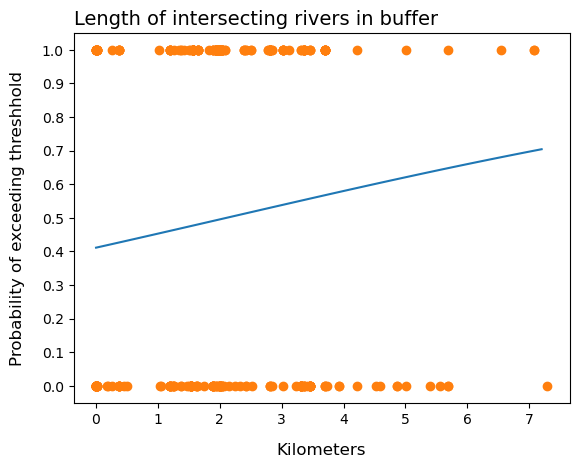

In [35]:
log_of = to_test[["location", "k"]].copy()
log_of["failed"] = log_of.k.astype(int)
log_of = log_of[["location", "failed"]]
dist_ct = pd.read_csv("resources/hex-3000m-cleaned/river-intersect-length.csv")
dist_lt = dist_ct.groupby("location").length.sum()
dist_lt["caprino"] = 0

log_of["r-length"] = log_of.location.apply(lambda x: dist_lt.loc[x])
log_of["r-length"] = log_of["r-length"]/1000
log_of.rename(columns={'r-length':'r_length'}, inplace=True)

obj_min, obj_max = log_of["r_length"].min(), log_of["r_length"].max()

formula = 'failed ~ r_length'
results = smf.logit(formula, data=log_of).fit(disp=False)
inter = results.params['Intercept']
slope = results.params['r_length']
xs = np.arange(obj_min, obj_max, step=.1)

log_odds = inter + slope * xs
odds = np.exp(log_odds)

ps_x = expit(inter + slope * xs)

fig, ax = plt.subplots()

ax.plot(xs, ps_x)
ax.plot(log_of["r_length"], log_of["failed"], 'o')
ax.set_title("Length of intersecting rivers in buffer", fontsize=14, loc='left')

ax.set_xlabel("Kilometers", fontsize=12,labelpad=12)
ax.set_ylabel("Probability of exceeding threshhold", fontsize=12, labelpad=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
plt.show()

In [36]:
threshhold

0.04

In [37]:
today = dt.datetime.now().date().strftime("%d/%m/%Y")
where = "Biel, CH"

my_block = f"""

This script updated {today} in {where}

> \u2764\ufe0f what you do everyday

*analyst at hammerdirt*
"""

md(my_block)



This script updated 05/06/2023 in Biel, CH

> ❤️ what you do everyday

*analyst at hammerdirt*


In [38]:
%watermark --iversions -b -r

Git repo: https://github.com/hammerdirt-analyst/landuse.git

Git branch: main

numpy      : 1.24.2
scipy      : 1.10.1
matplotlib : 3.7.1
statsmodels: 0.13.5
json       : 2.0.9
pandas     : 2.0.0
seaborn    : 0.12.2
IPython    : 8.12.0
PIL        : 9.5.0

